# The Goal of Notebook
The goals of this Notebook is to answer on question whether some particular star variable and classify it. THen uild algorithm to investigate stars.

In [2]:
!nvidia-smi
!python --version

/bin/bash: line 1: nvidia-smi: command not found
Python 3.11.11


## 1 Prepare environment

### 1.1 Import astronomical packages
+ `lightkurve` - [library](https://lightkurve.github.io/lightkurve/index.html) library for discovery Kepler and Tess datasets
+ `astropy` - [library](https://www.astropy.org/) designed for astronomy and astrophysics. It provides a comprehensive suite of tools for handling astronomical data, performing scientific computations, and supporting research workflows
+ `astroquery` - [library](https://astroquery.readthedocs.io/en/latest/) with a set of tools for querying astronomical web forms and databases.

### 1.2 Import math and visialization libraries
+ `numpy` - [library](https://numpy.org/) support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
+ `pandas` - [library](https://pandas.pydata.org/) for data manipulation and analytics
+ `maptlotlib` - [library](https://matplotlib.org/) for for visualization static, animated, and interactive visualizations
+ `ffmpeg` - [library](https://www.ffmpeg.org/) for handling video, audio and multimedia files and streams (enable animations in lightkurve)
+ `ipympl` - [library](https://matplotlib.org/ipympl/) for enabling interactive Matplotlib plots directly within Jupyter Notebooks

In [ ]:
import io

# astronomy packages
try:
  import lightkurve as lk
except:
  !pip install lightkurve --upgrade
  # ffmpeg animation library
  # !apt-get install -y ffmpeg
  import lightkurve as lk

try:
  import astropy as ast
except:
  !pip install astropy --upgrade
  import astropy as ast

import astroquery as aq

# math packages
import numpy as np
import pandas as pd

# visualization packages
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
# %matplotlib widget
# %matplotlib notebook
try:
  import ffmpeg
except:
  !apt-get install -y ffmpeg
try:
  import ipympl
except:
  !pip install ipympl

from IPython.display import display

# Check versions
print('Lightkurve version: ' + lk.__version__)
print('Astropy version: ' + ast.__version__)
print('Numpy version: ' + np.__version__)
print('Matplotlib version: ' + matplotlib.__version__)
print('Pandas version: ' + pd.__version__)

## 2 Download datasets for interested starts

### 2.1 Define starts
 * Interested stars are collected in /data/test_vstars_*.csv files. There are their numbers from TESS Input Catalog (TIC)

In [4]:
def append_prefix(df: pd.DataFrame,
                  prefix="TIC "):
  list = []
  for num in df[0]:
      list.append(f"{prefix}{num}")
  return np.array(list)

In [5]:
star_names_50_1_url = "https://raw.githubusercontent.com/serhiikartashov/discovery-astronomic-objects/refs/heads/main/data/tess_vstars_50_1.csv"
star_names_50_2_url = "https://raw.githubusercontent.com/serhiikartashov/discovery-astronomic-objects/refs/heads/main/data/tess_vstars_50_2.csv"
star_names = pd.read_csv(star_names_50_2_url, header=None)

# Convert to a NumPy array
tic_star_names = append_prefix(star_names)

# Print the final array
print(tic_star_names)

['TIC 117614745' 'TIC 117663155' 'TIC 127958018' 'TIC 13767468'
 'TIC 141521914' 'TIC 150314061' 'TIC 156480165' 'TIC 160536227'
 'TIC 198183714' 'TIC 198237897' 'TIC 219096061' 'TIC 219772712'
 'TIC 219844480' 'TIC 219849662' 'TIC 224602388' 'TIC 224604945'
 'TIC 229440959' 'TIC 229456125' 'TIC 229617303' 'TIC 232624463'
 'TIC 233055967' 'TIC 233501332' 'TIC 233691740' 'TIC 233712251'
 'TIC 237205344' 'TIC 237224245' 'TIC 252221997' 'TIC 264303333'
 'TIC 26433189' 'TIC 269663822' 'TIC 285876156' 'TIC 289590826'
 'TIC 298666521' 'TIC 321220494' 'TIC 333805840' 'TIC 341873283'
 'TIC 353769828' 'TIC 354267924' 'TIC 357033218' 'TIC 366310211'
 'TIC 376883820' 'TIC 377157902' 'TIC 383622780' 'TIC 384839186'
 'TIC 397290099' 'TIC 409809938' 'TIC 49853887' 'TIC 72352411'
 'TIC 87793687' 'TIC 94675328']


### 2.2 Collect datasets
 * find lightcurves for selected starts

In [36]:
from tqdm.auto import tqdm

def search_and_download_lightcurves(targets: list[str],
                       sector: int,
                       mission="TESS"):
  lc_list = []
  for target in tqdm(targets):
    lc_list.append(lk.search_lightcurve(target=target, sector=sector, mission=mission).download());
  return lc_list;

def search_lightcurves(targets: list[str],
                       sector: int,
                       mission="TESS"):
  lc_list = []
  for target in tqdm(targets):
    lc_list.append(lk.search_lightcurve(target=target, sector=sector, mission=mission));
  return lc_list;

In [7]:
lc_datasets = search_and_download_lightcurves(tic_star_names, 86, "TESS");

  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


## 3 Plot lightcurves for selected stars (optional)
 * these lightcurves use Ulian Calendar and mmag for X and Y.

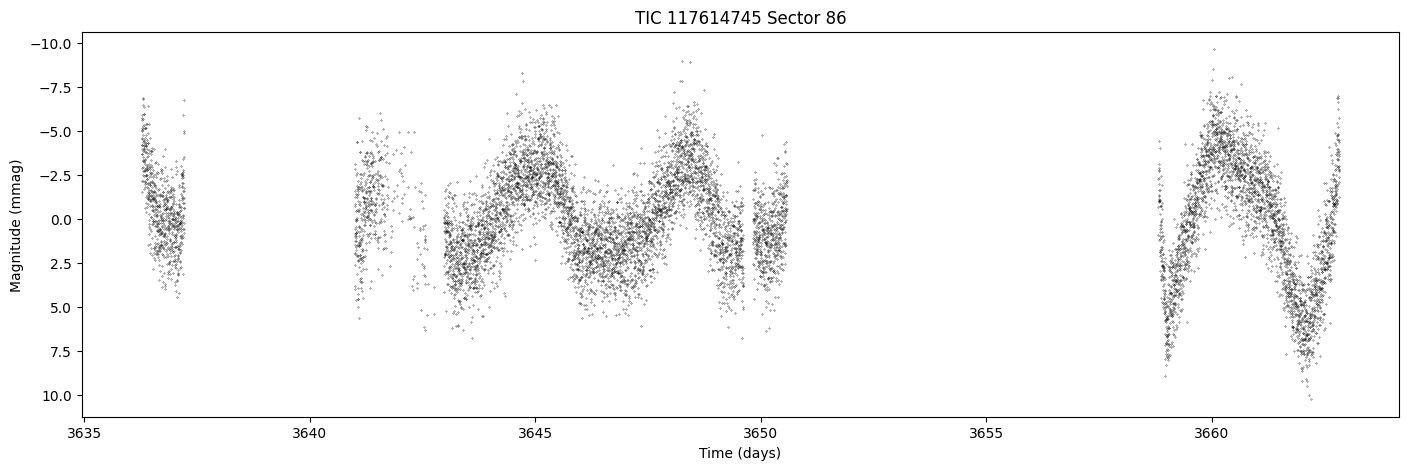

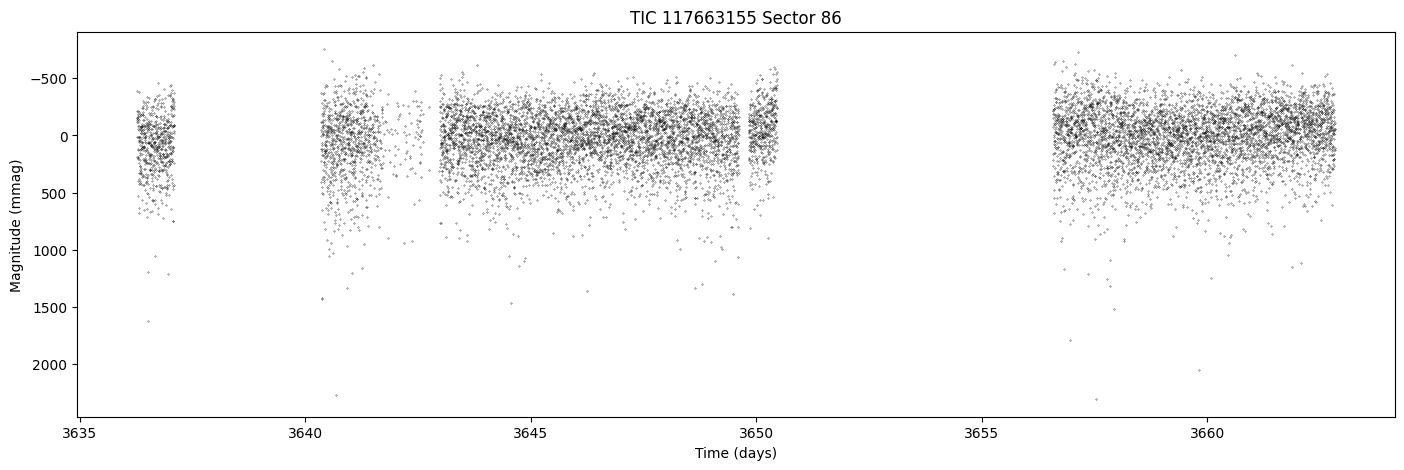

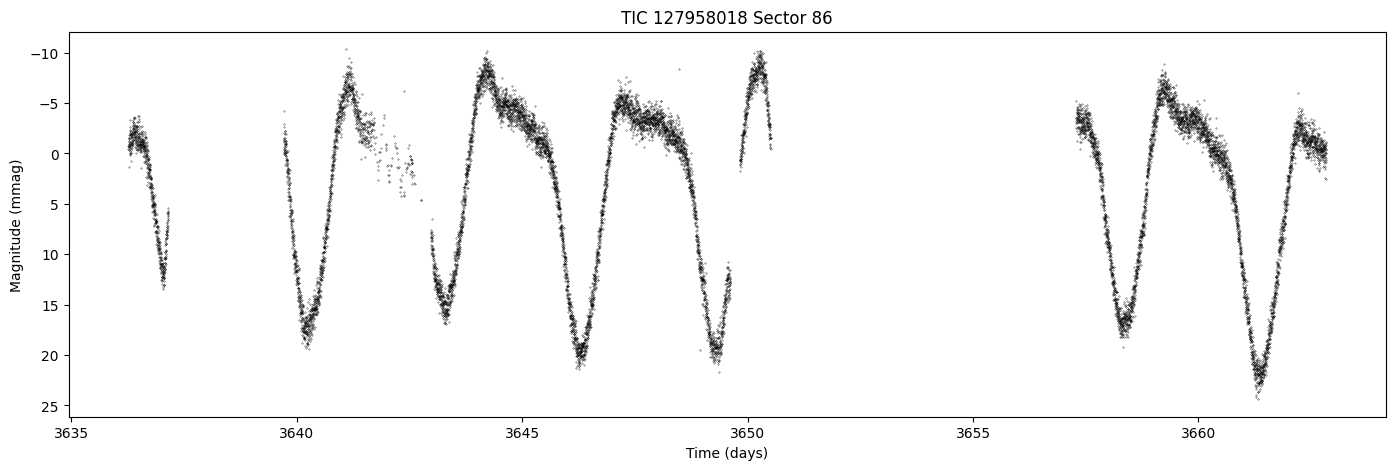

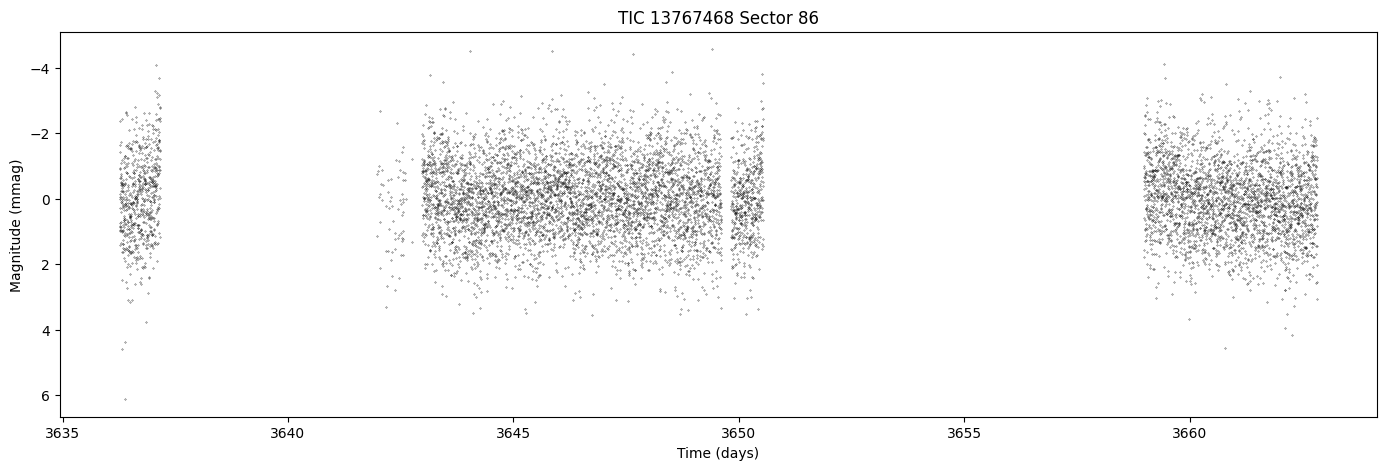

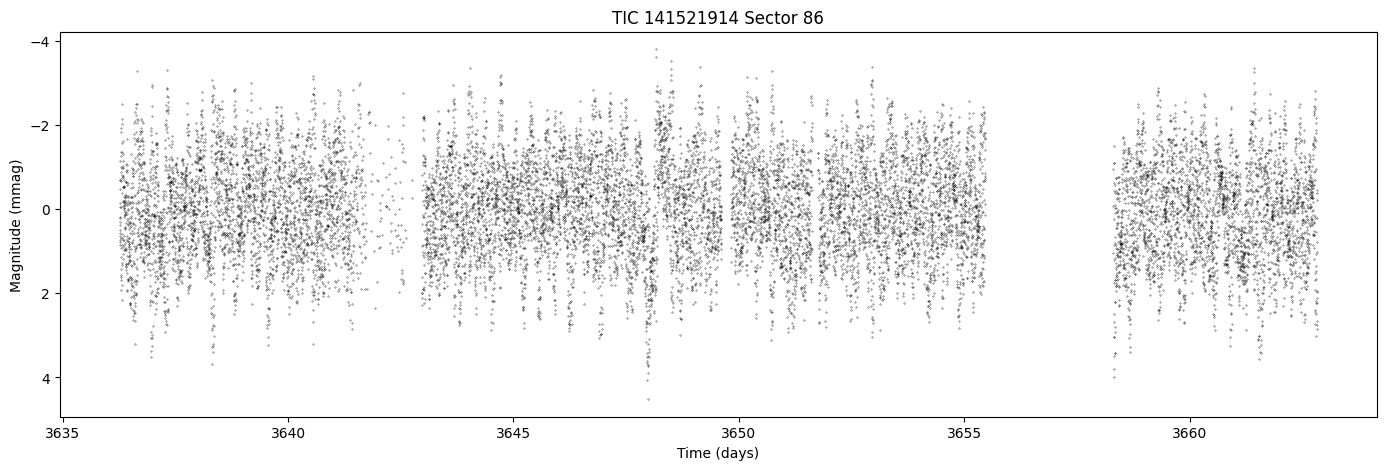

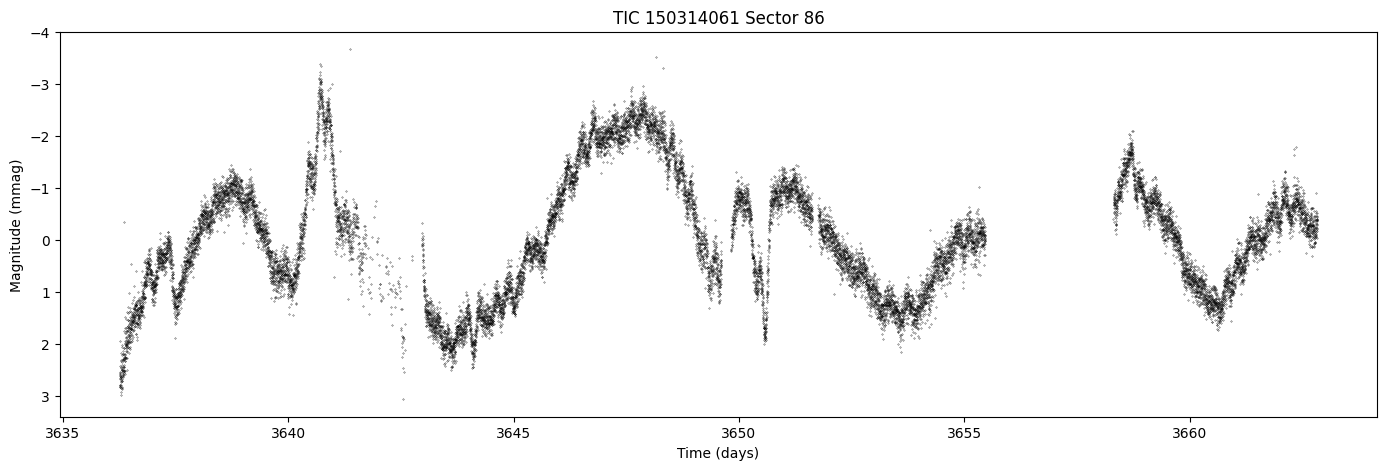

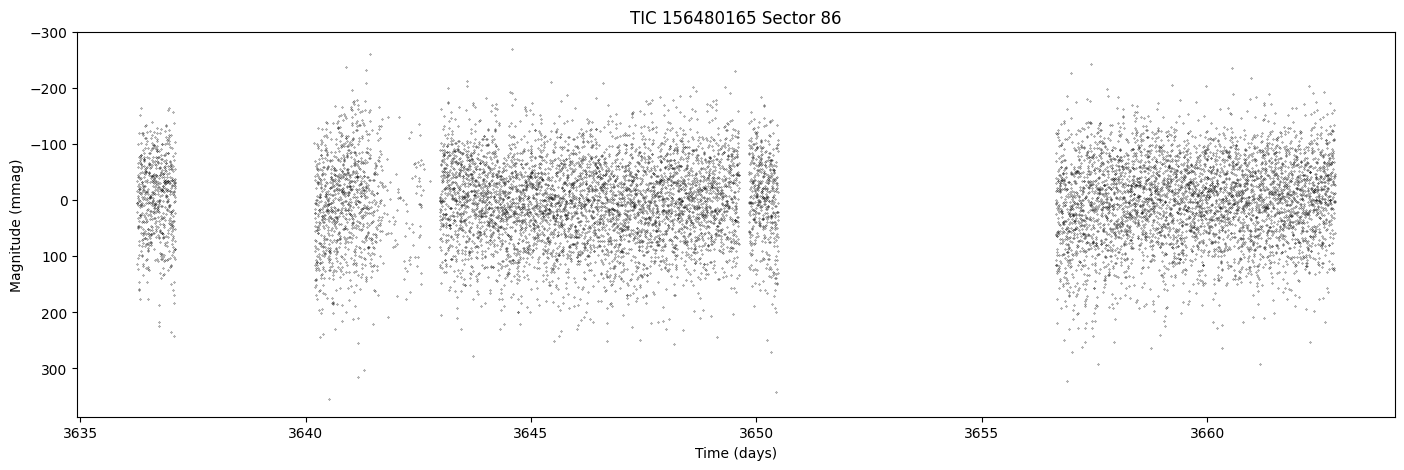

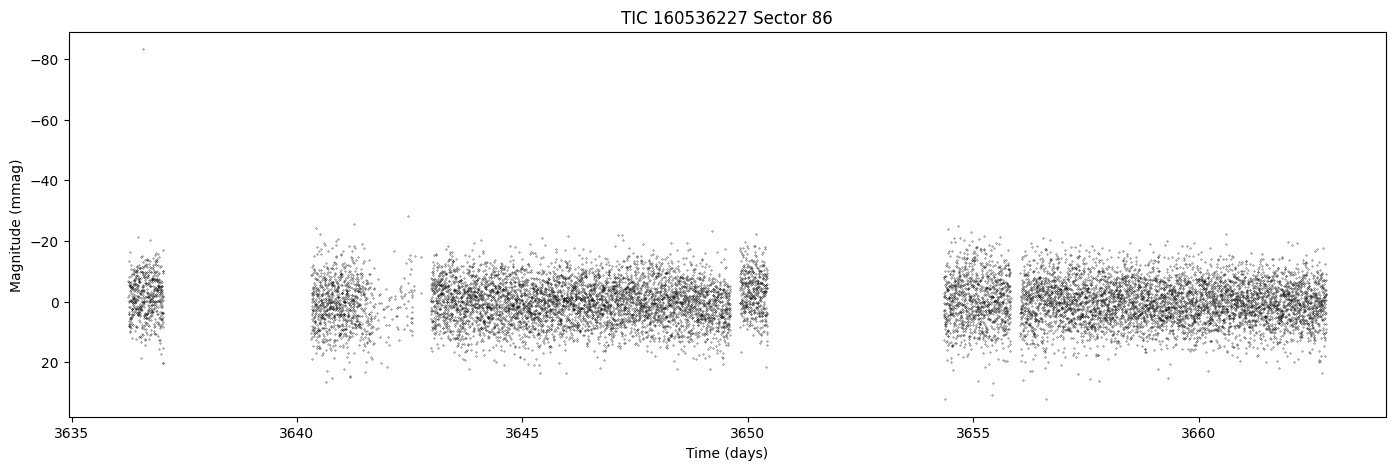

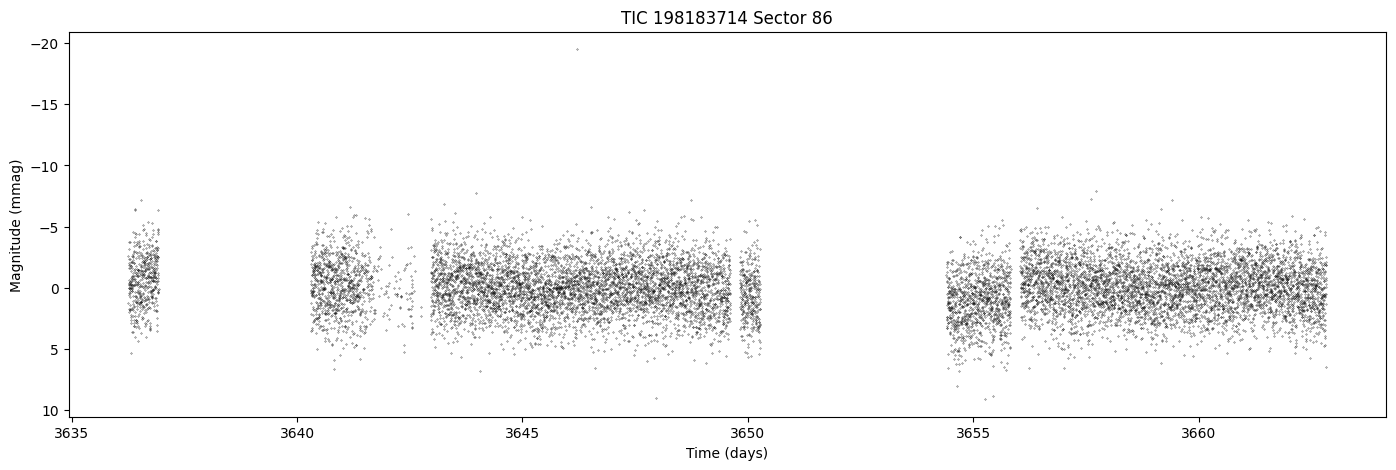

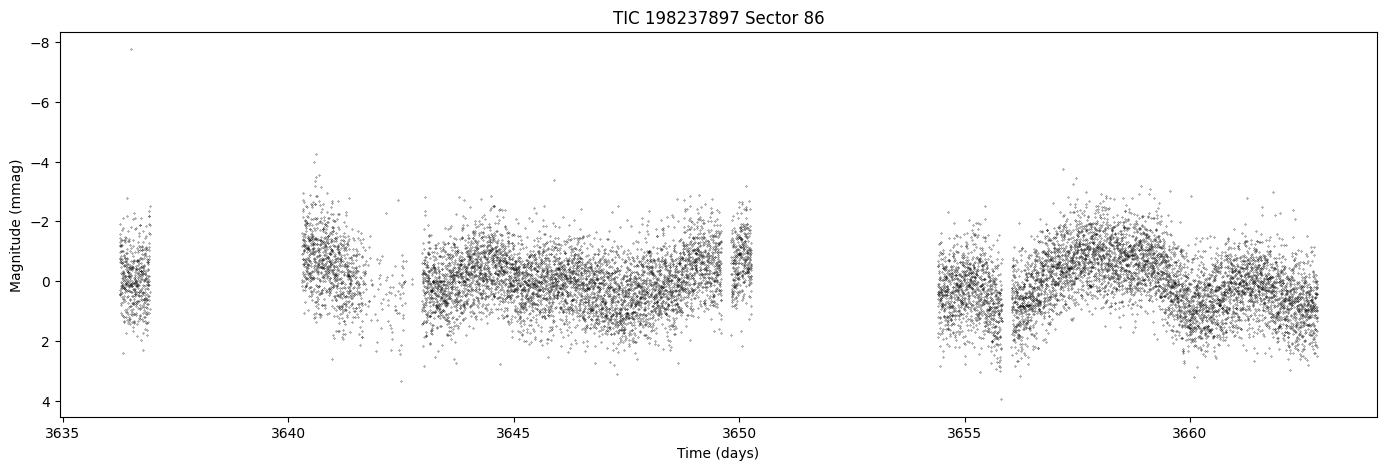

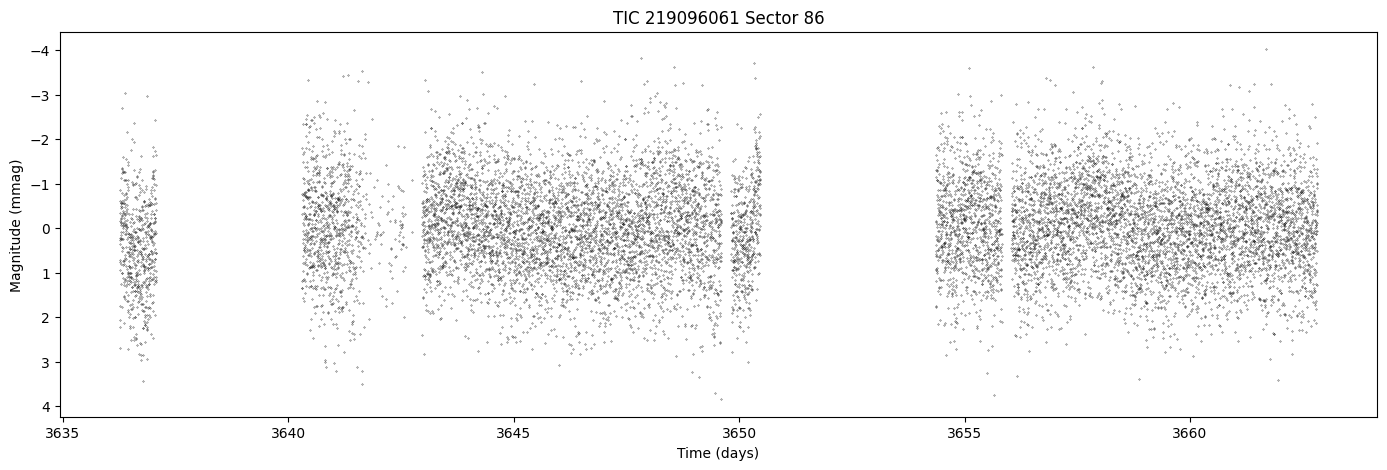

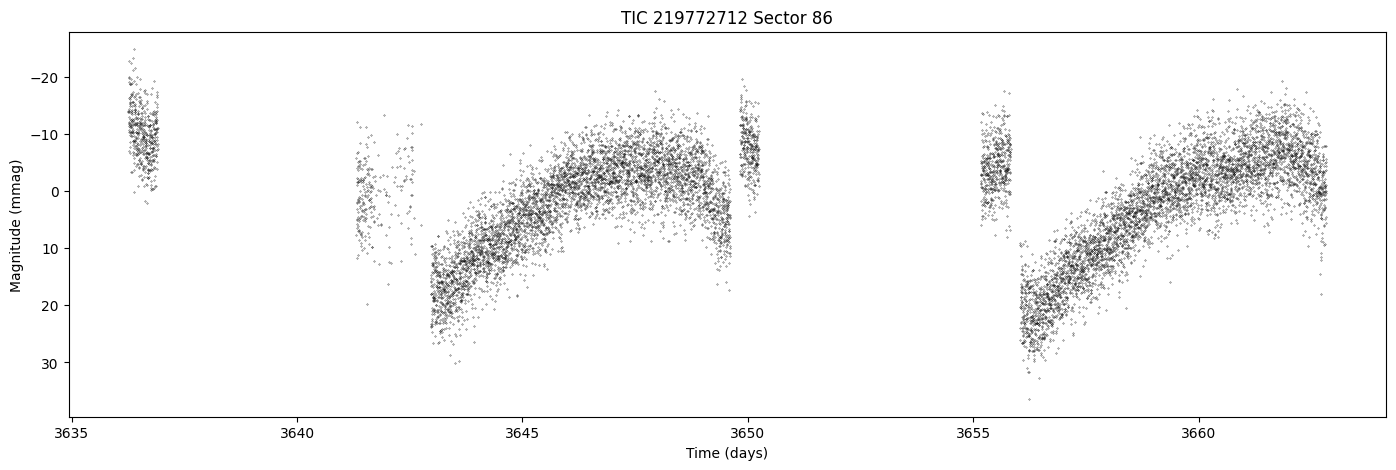

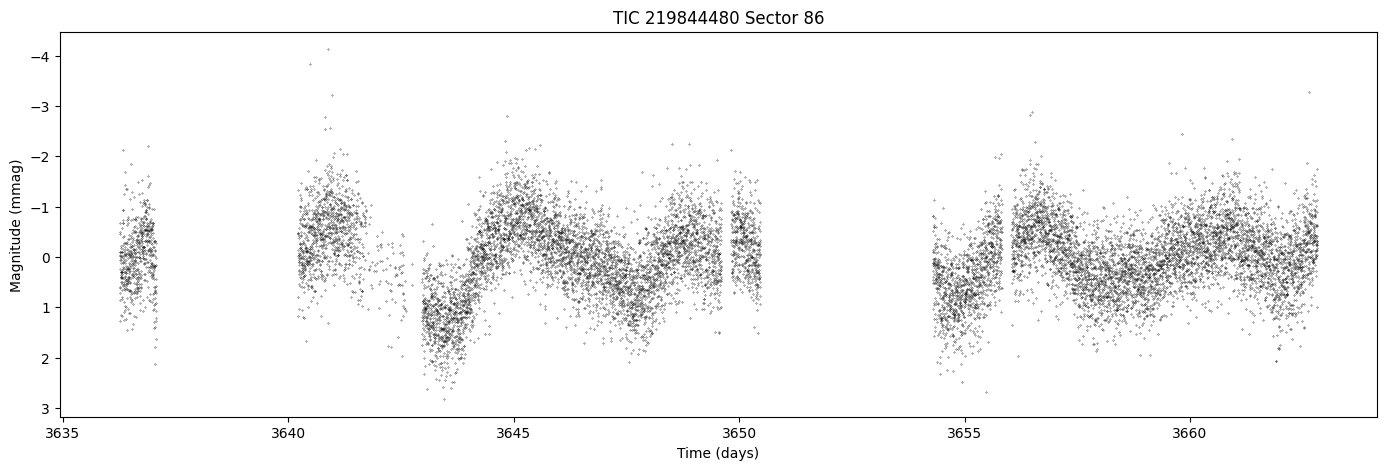

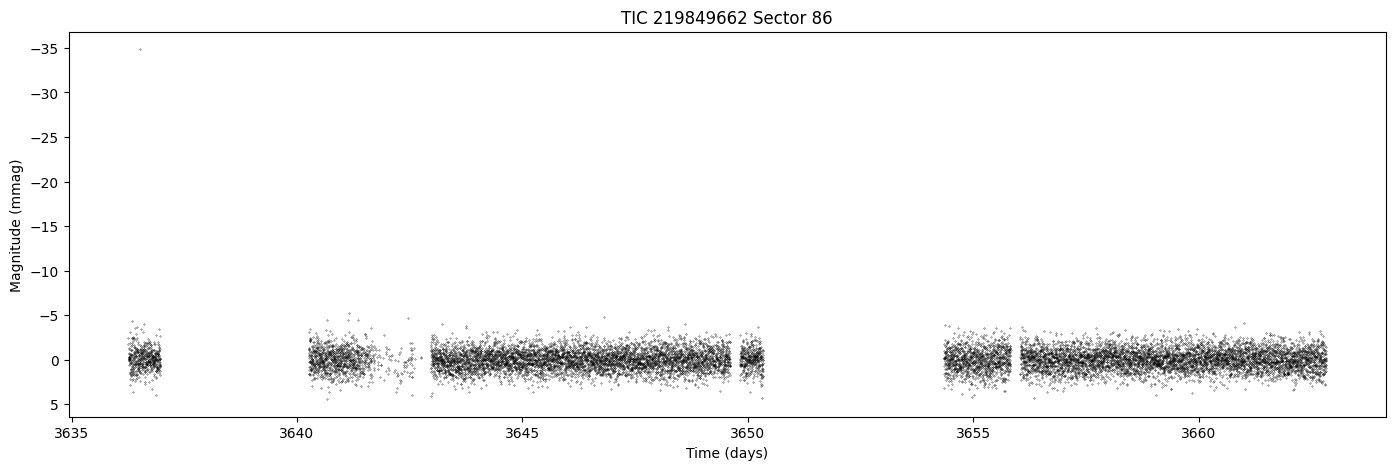

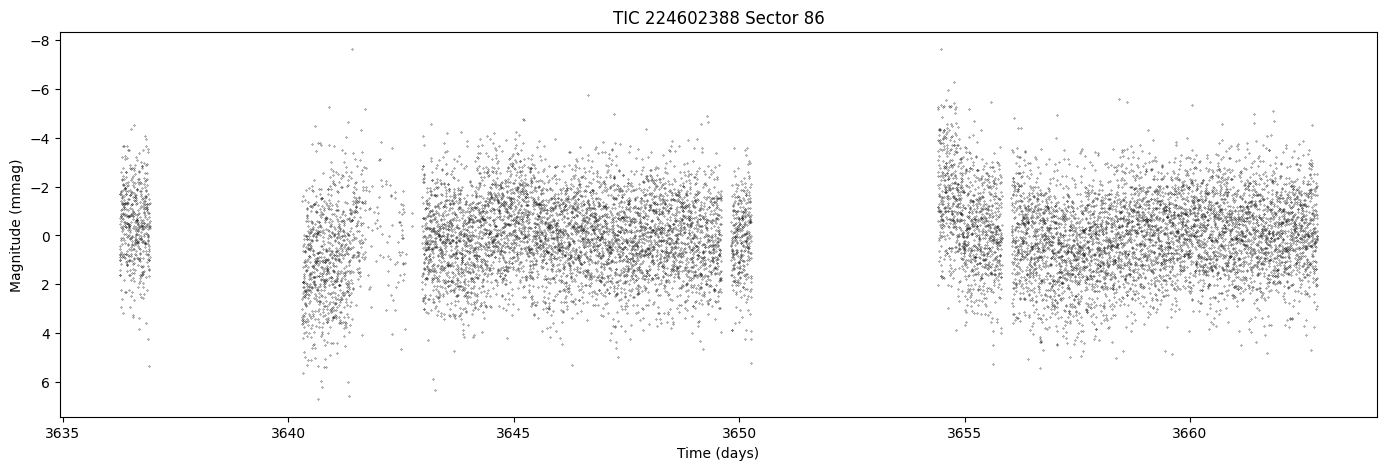

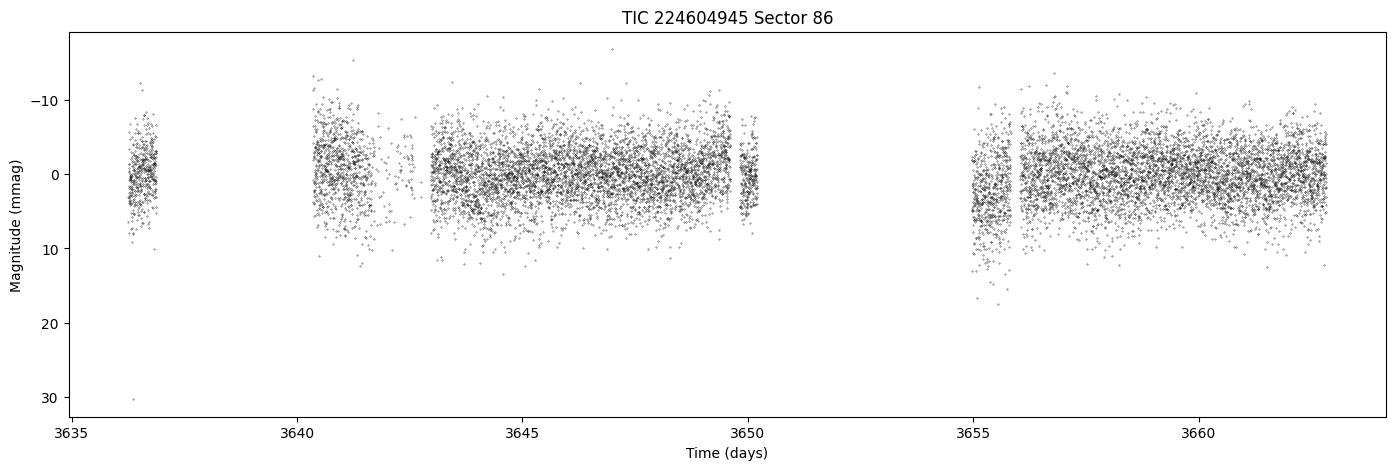

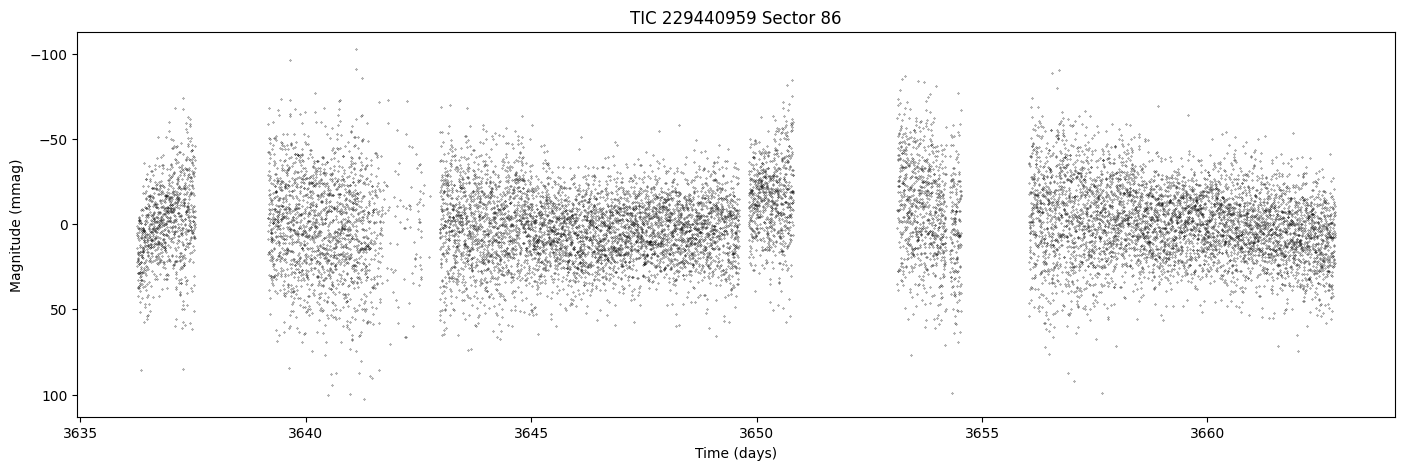

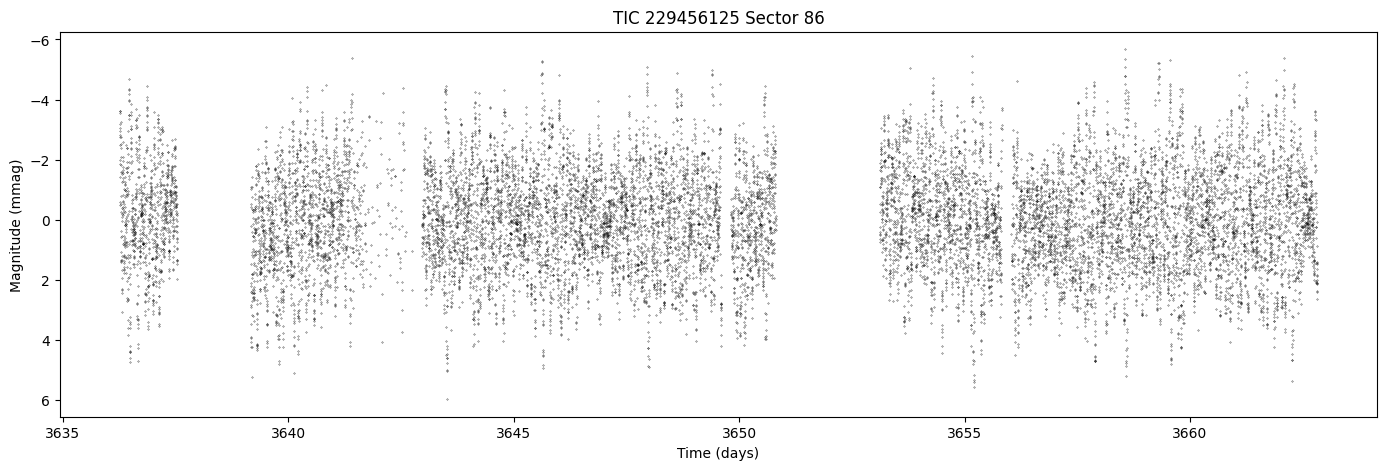

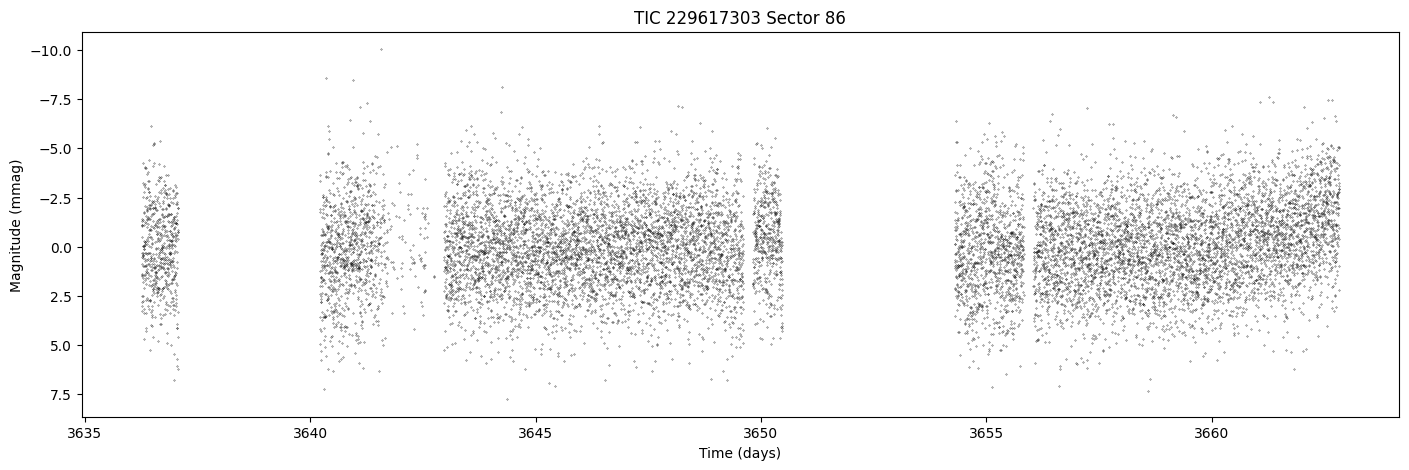

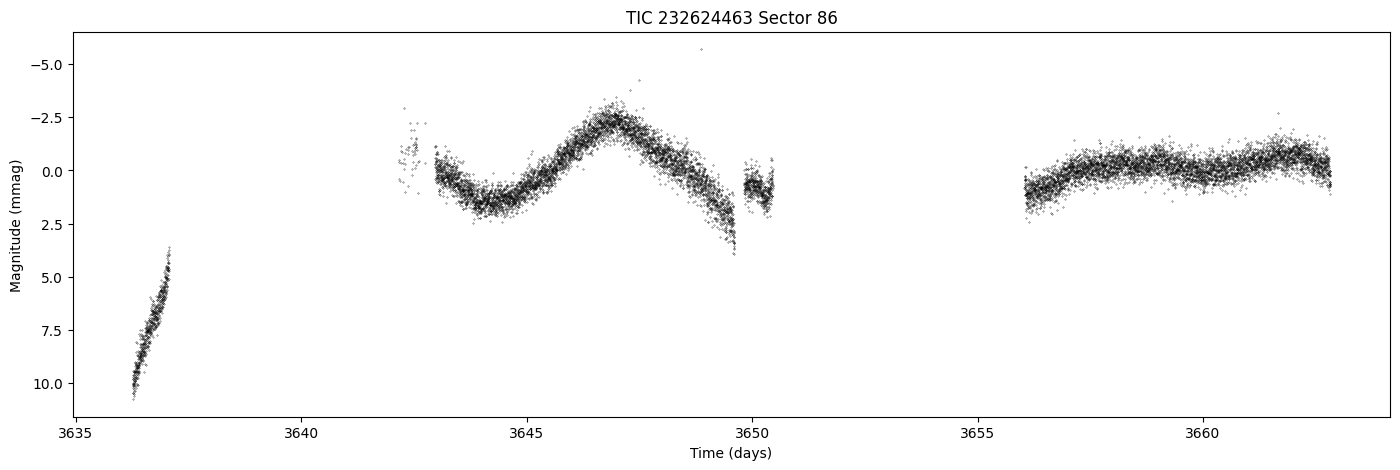

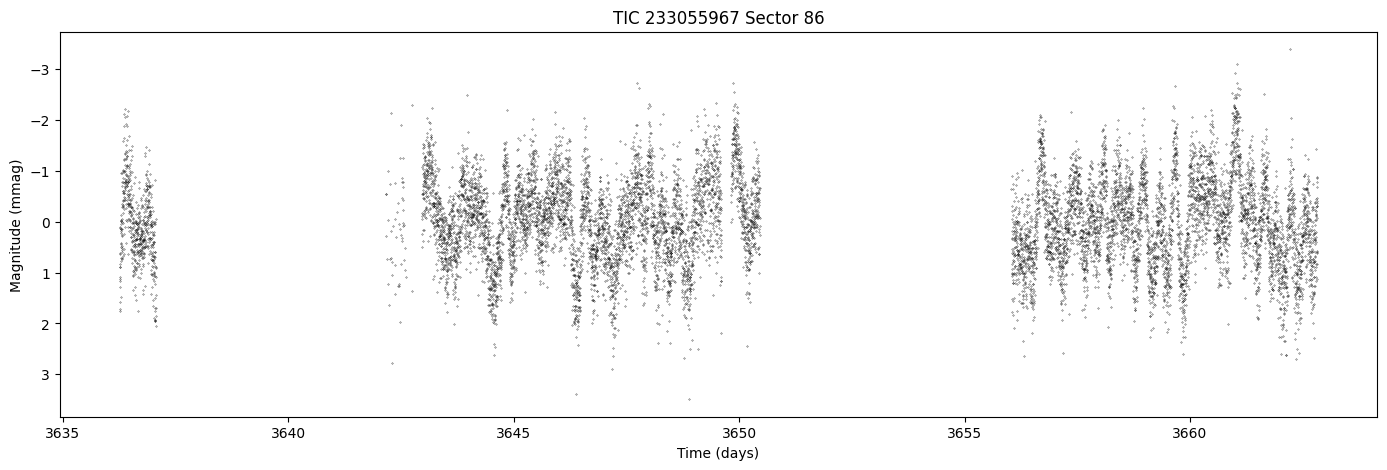

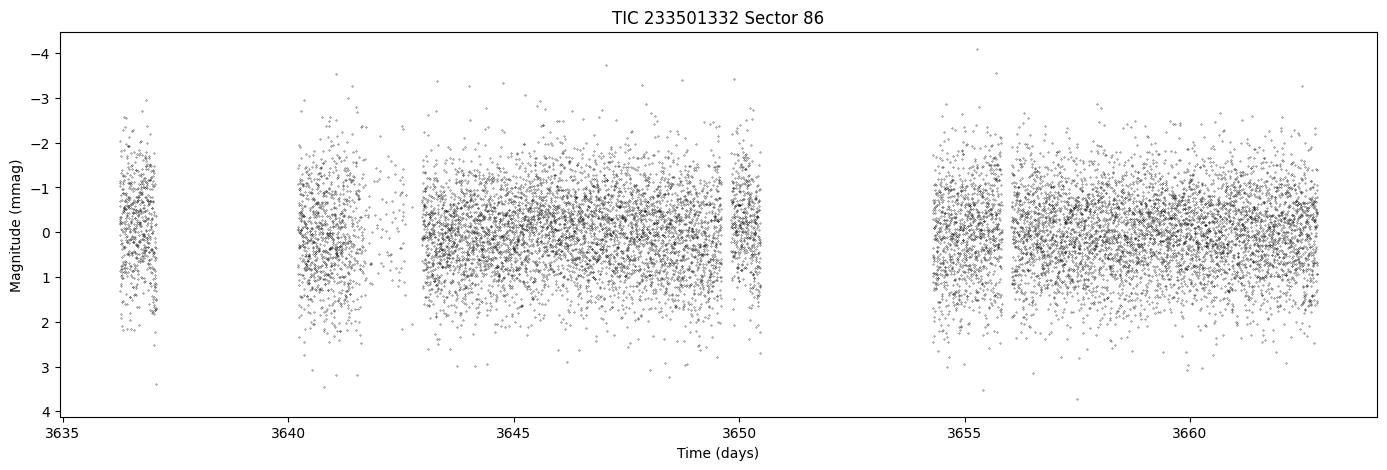

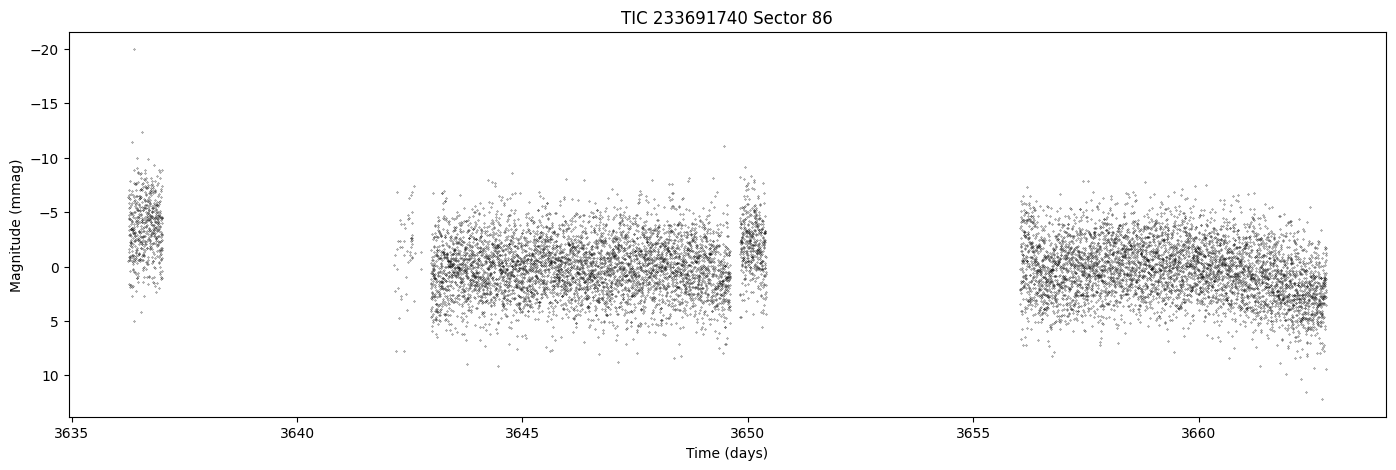

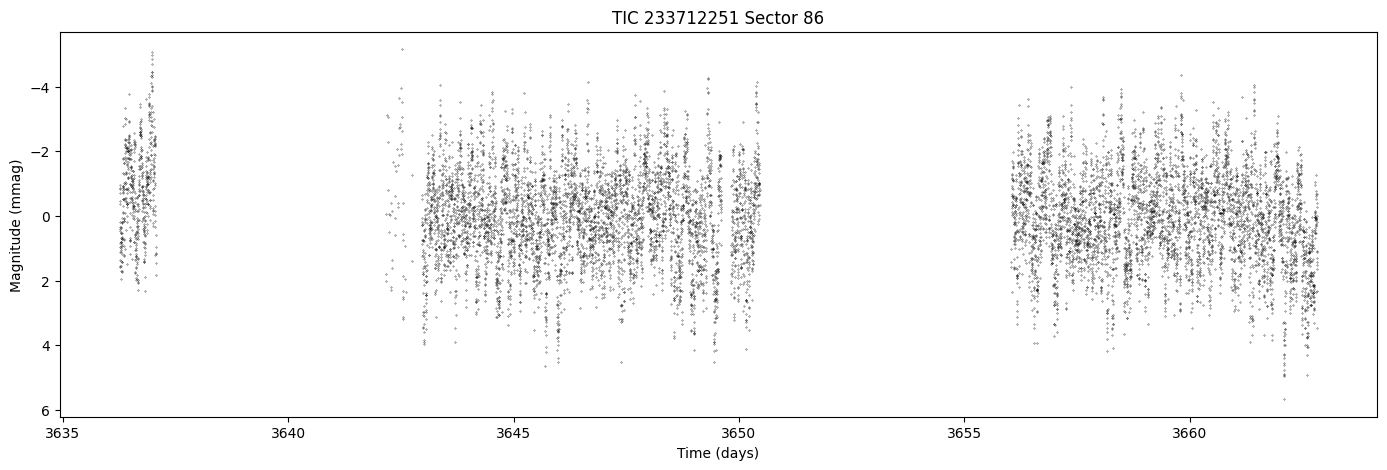

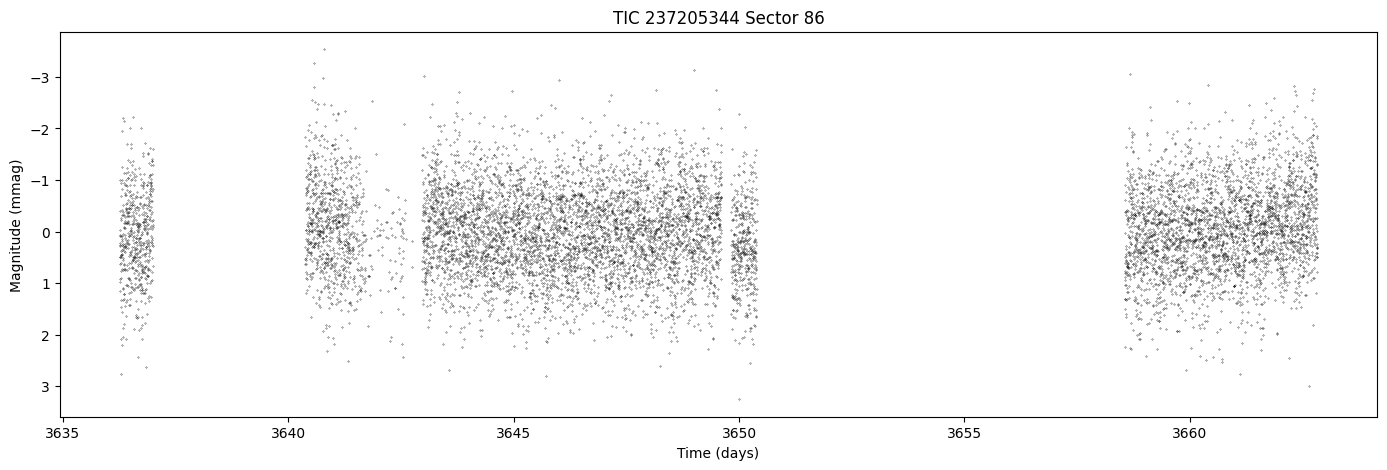

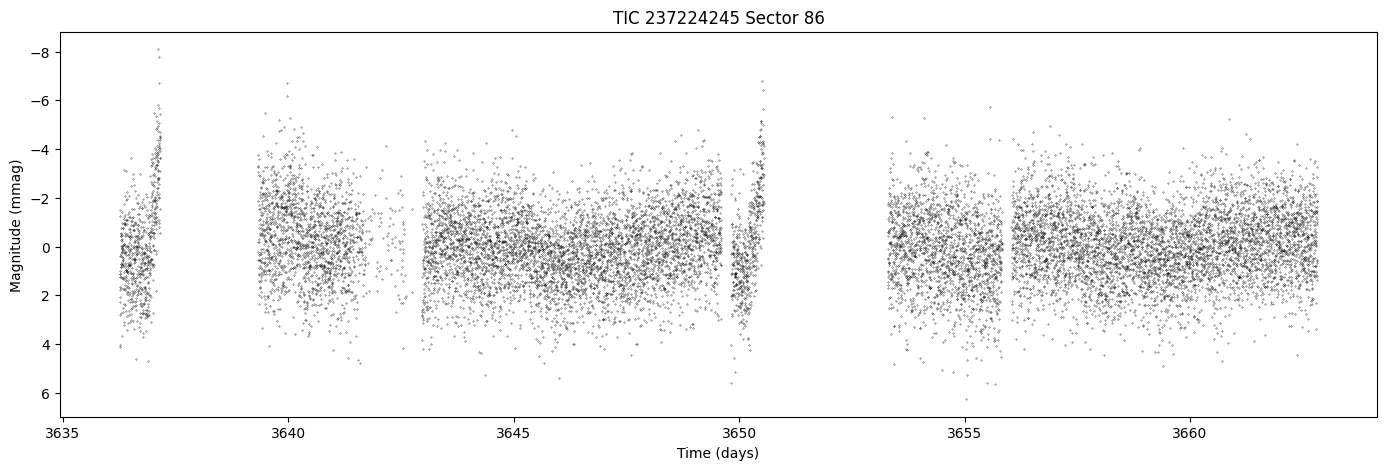

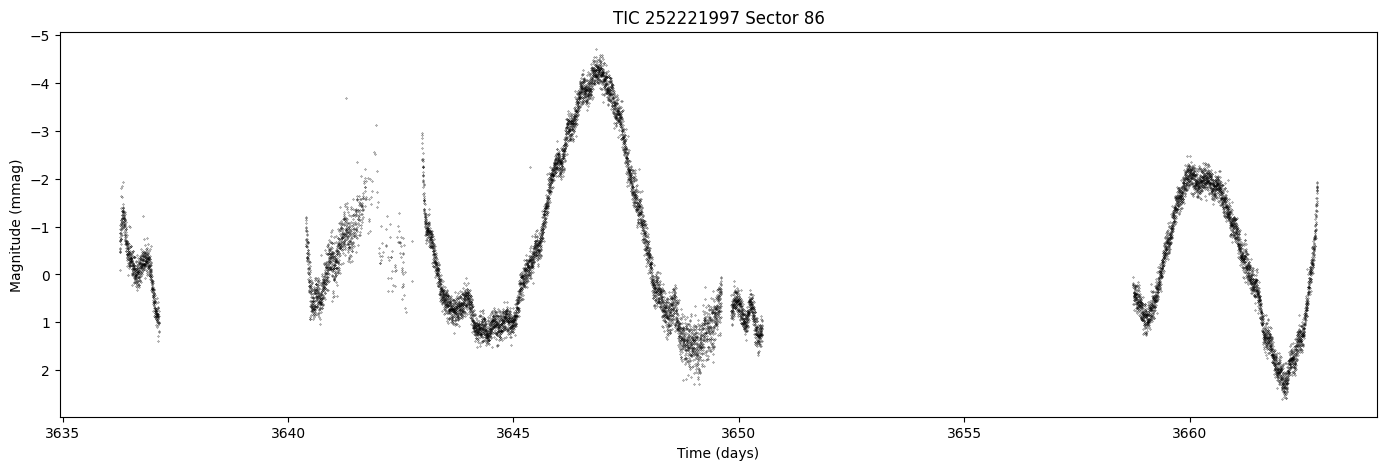

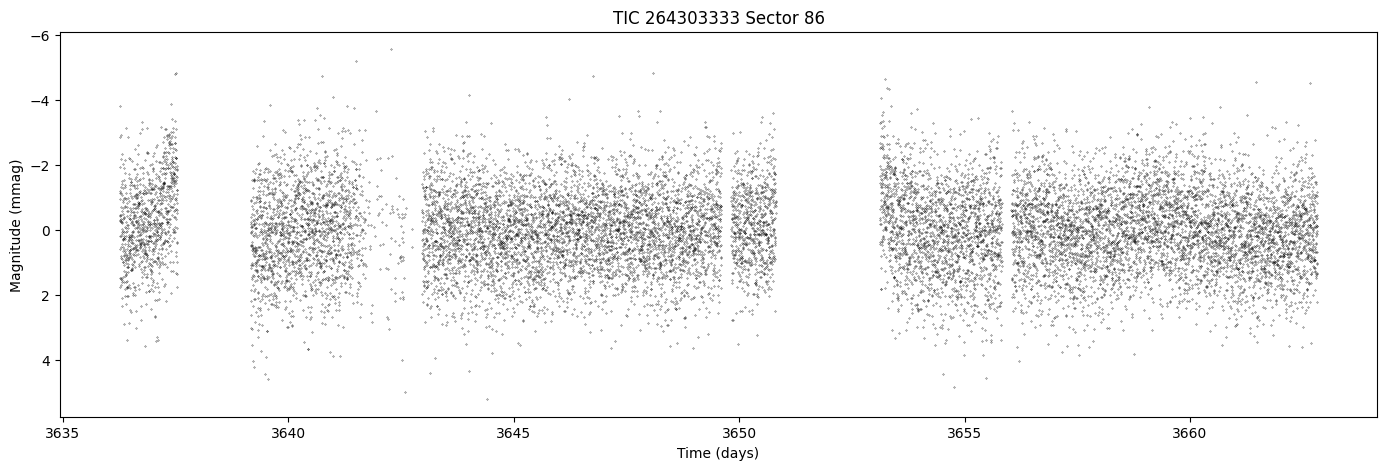

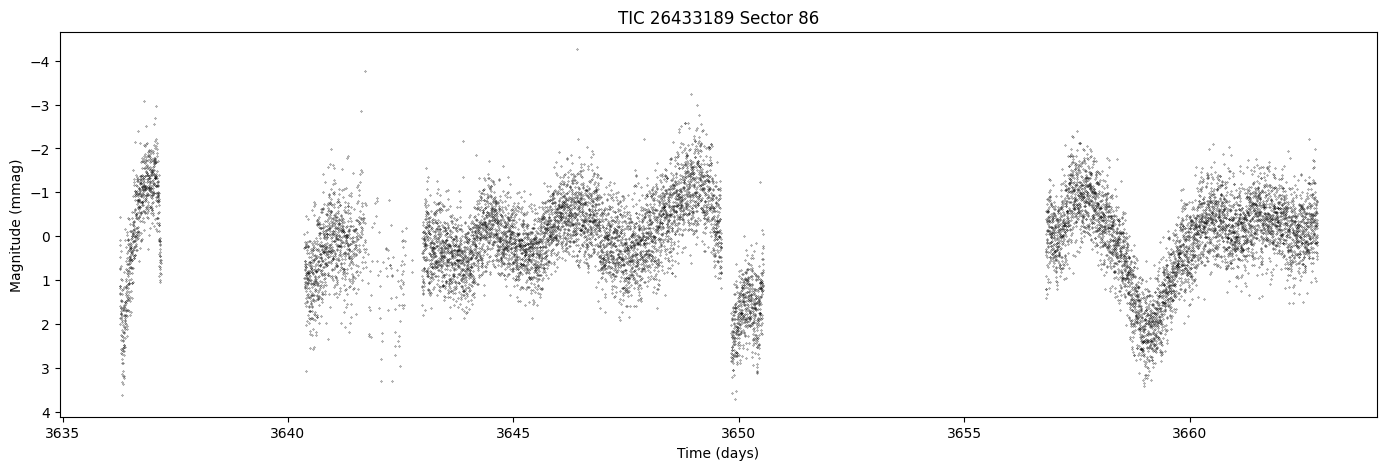

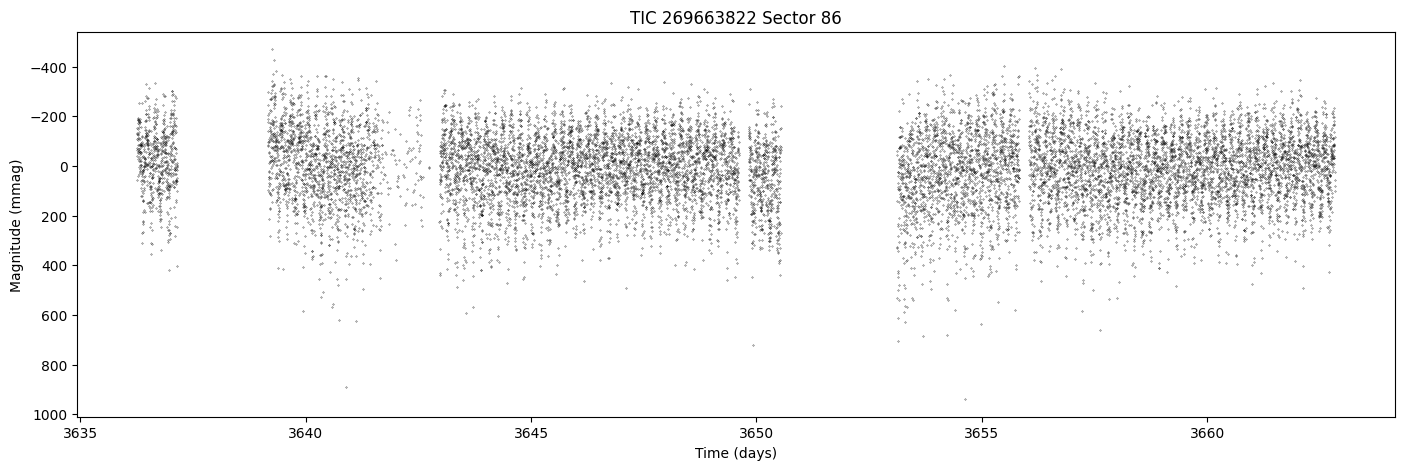

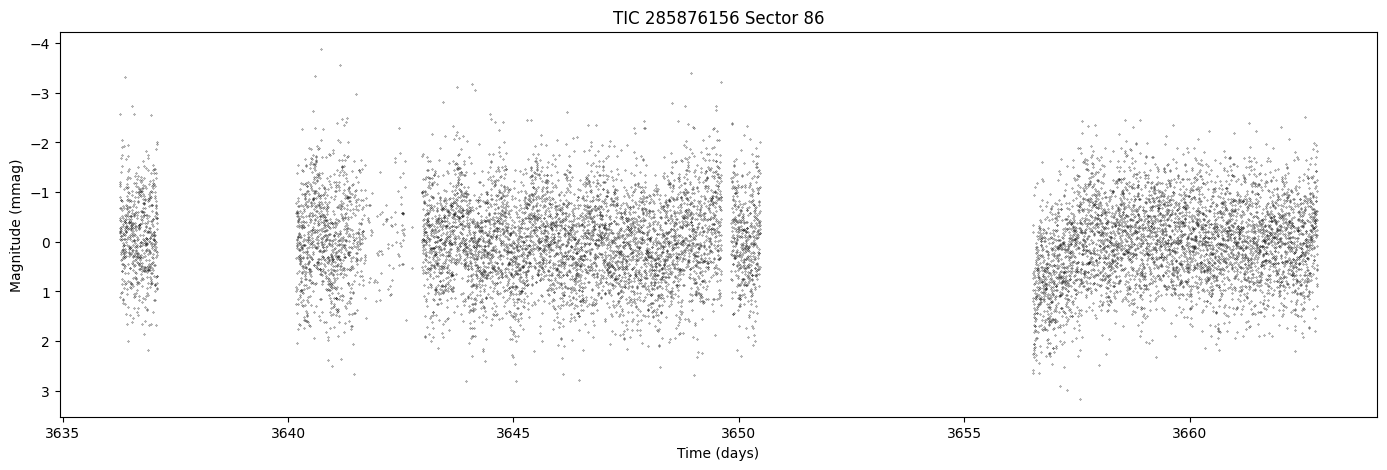

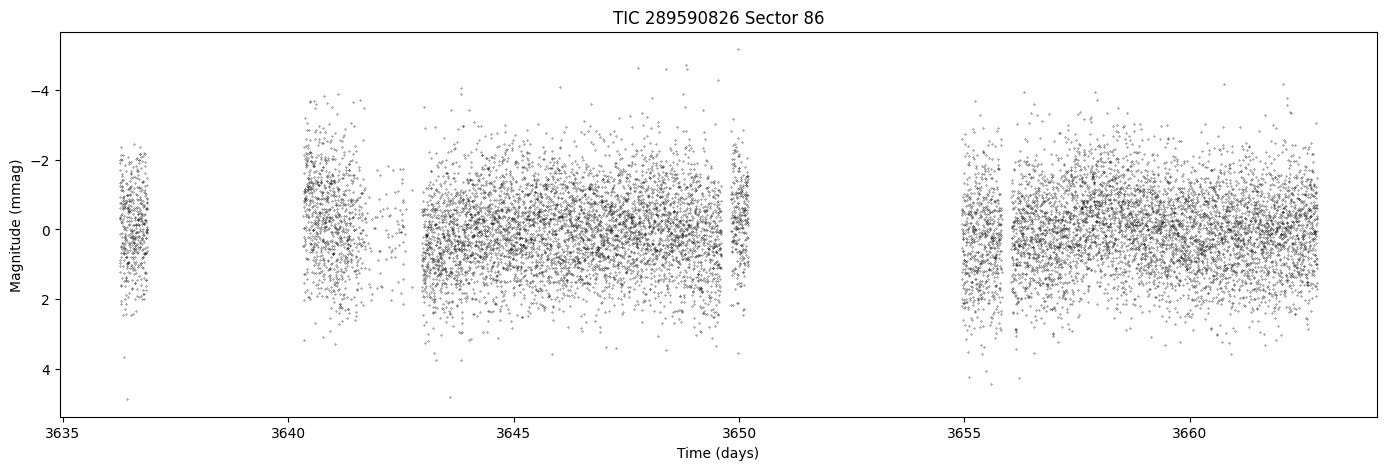

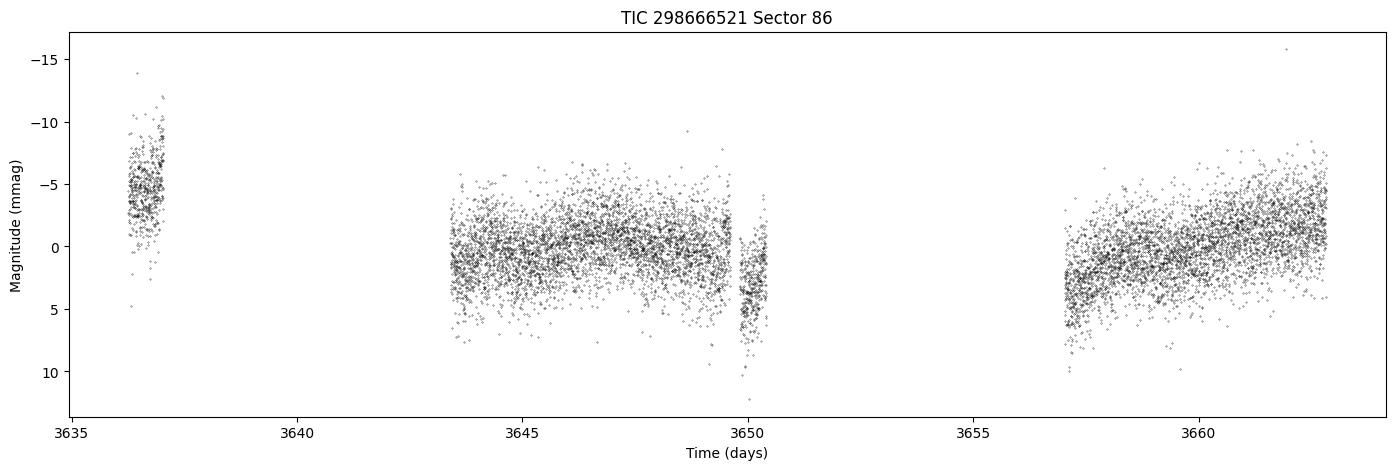

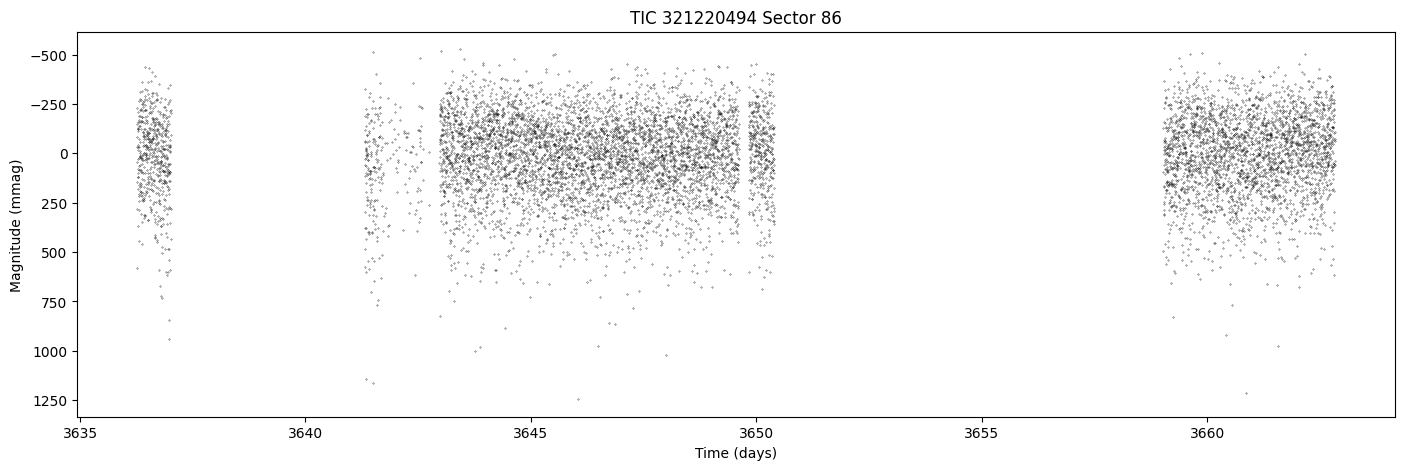

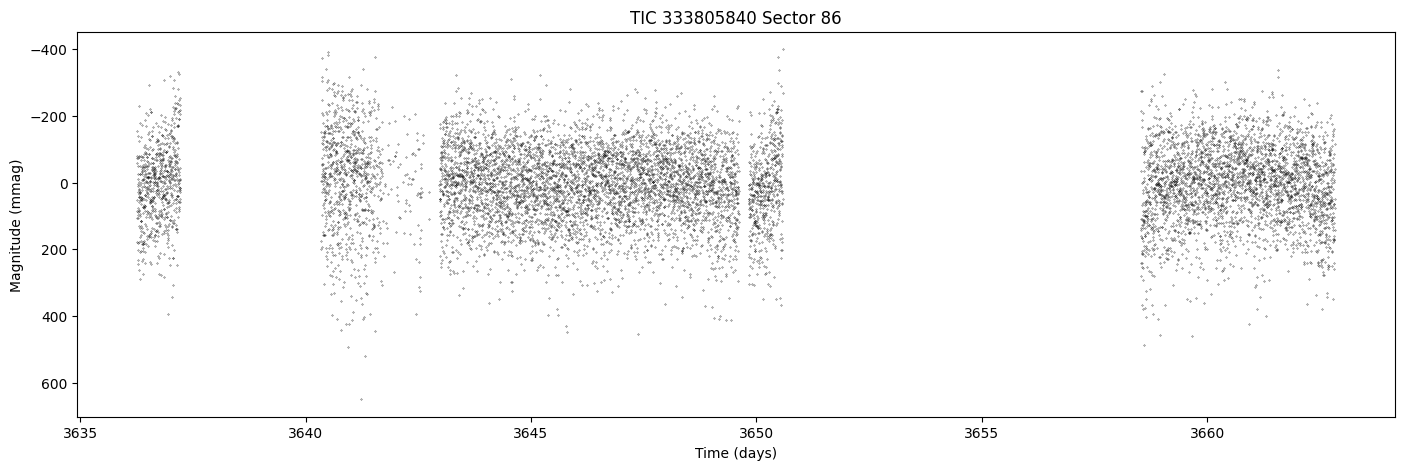

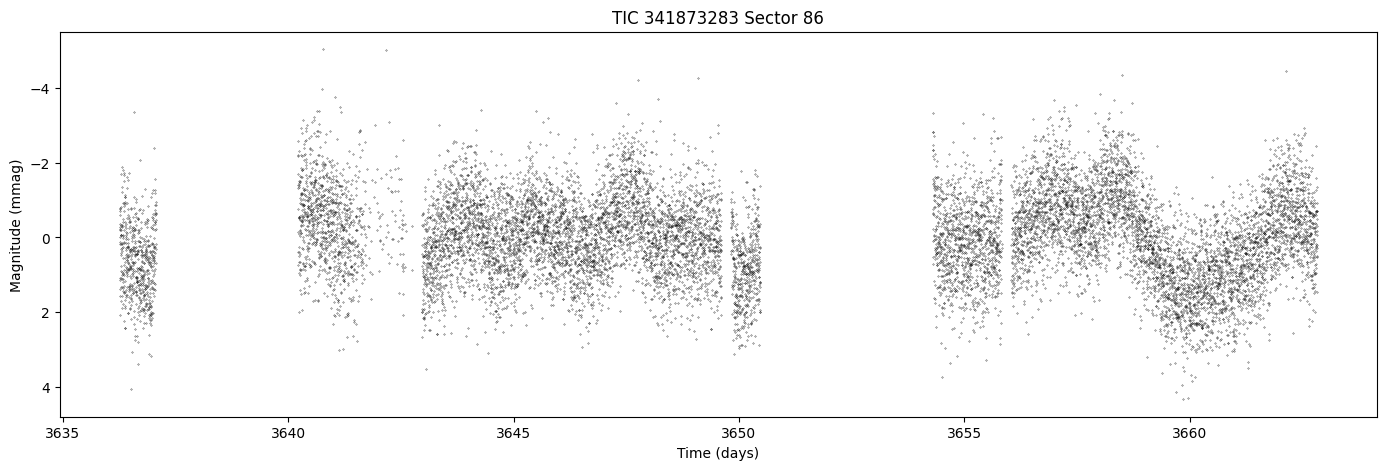

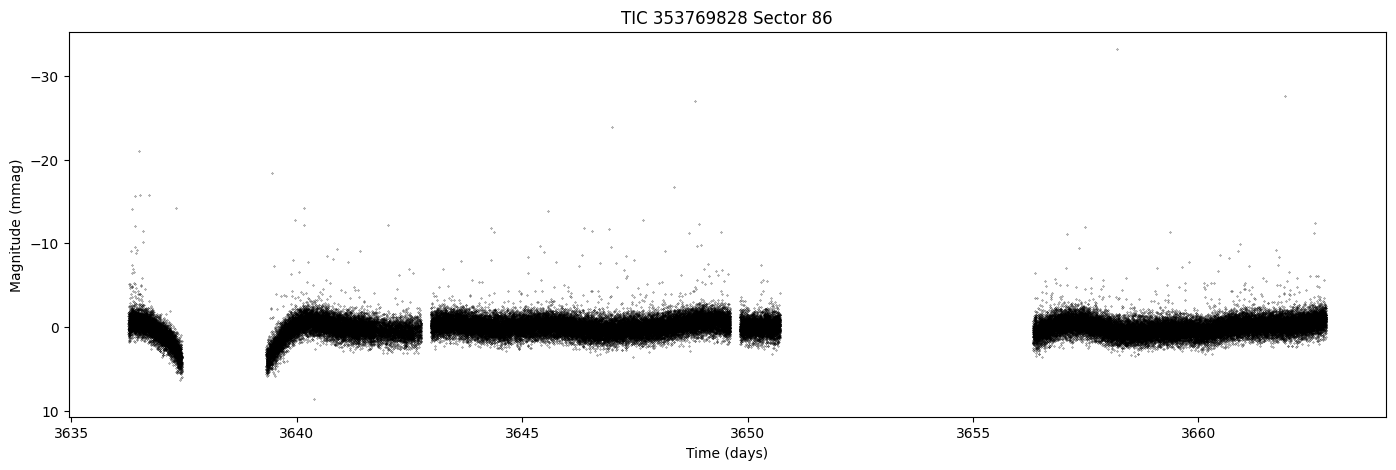

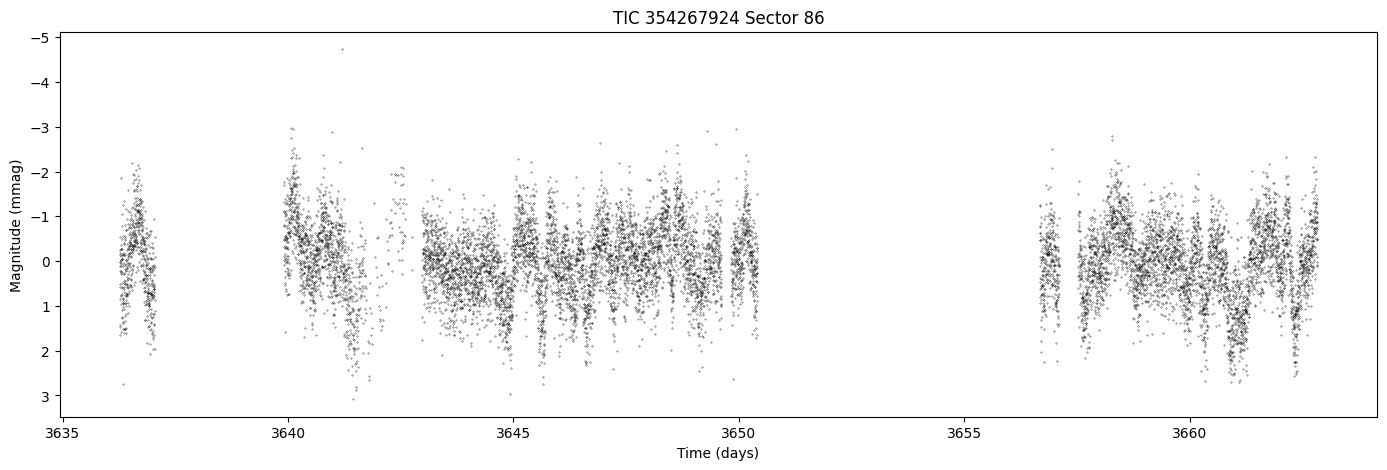

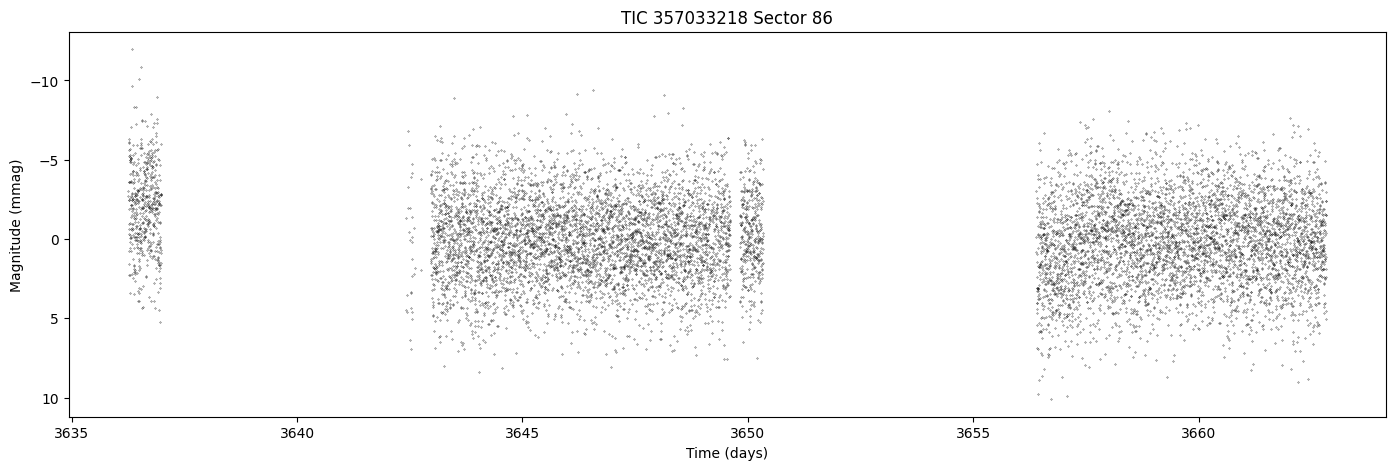

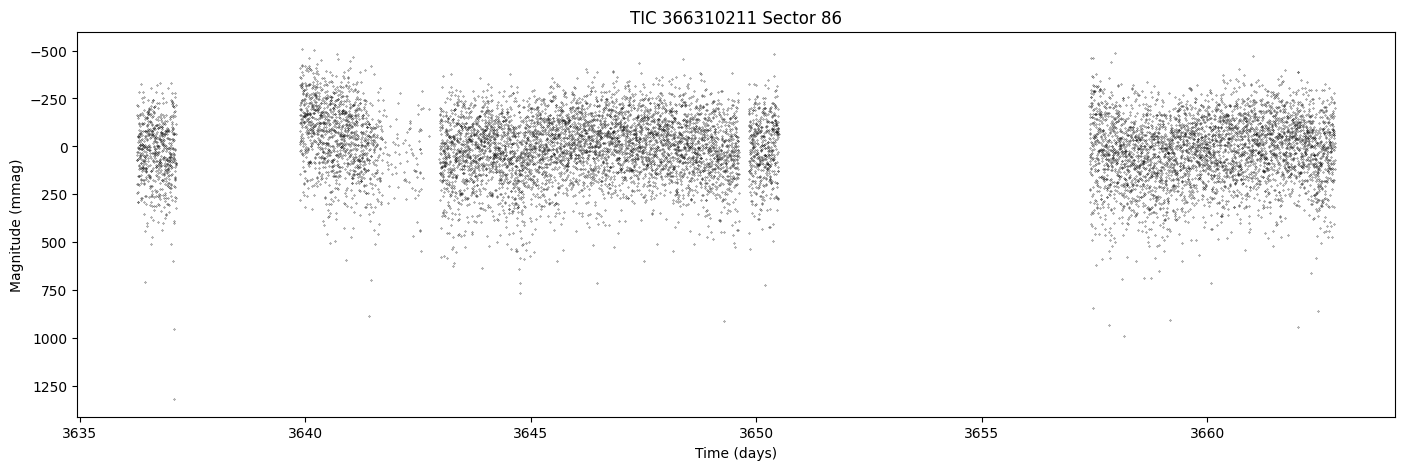

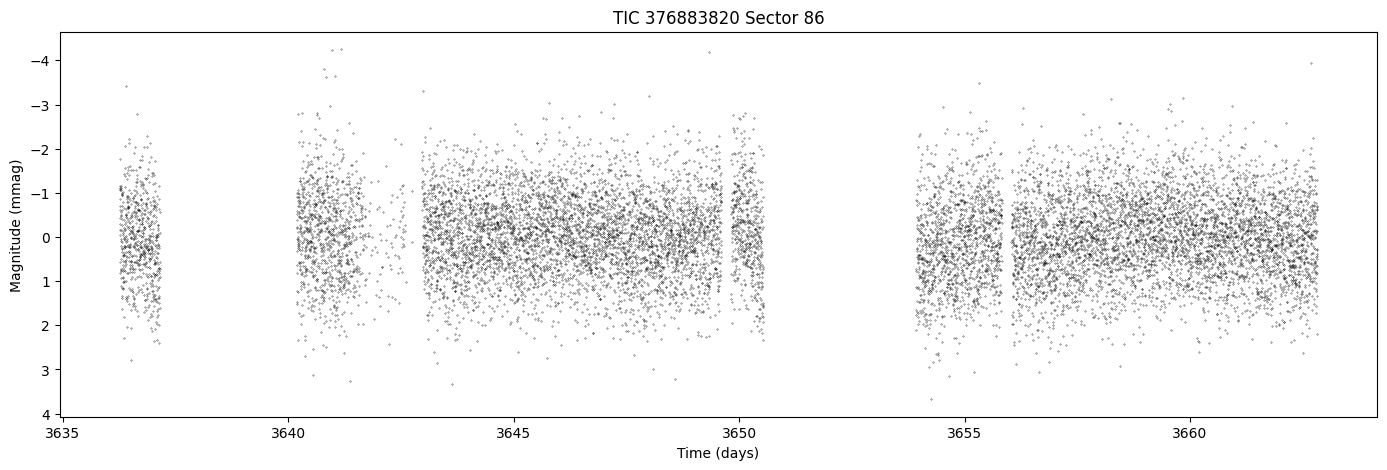

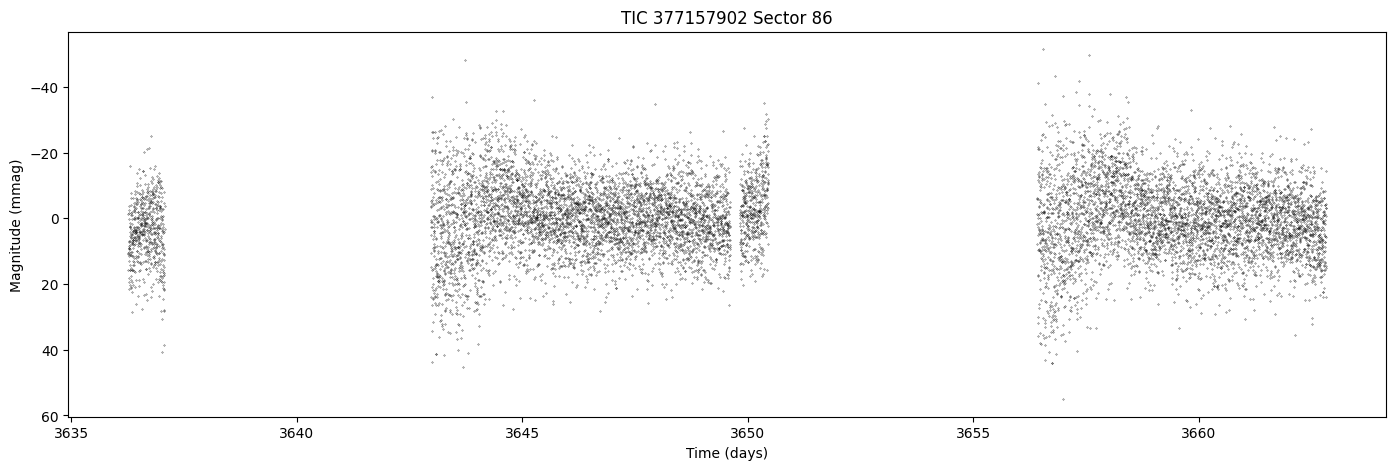

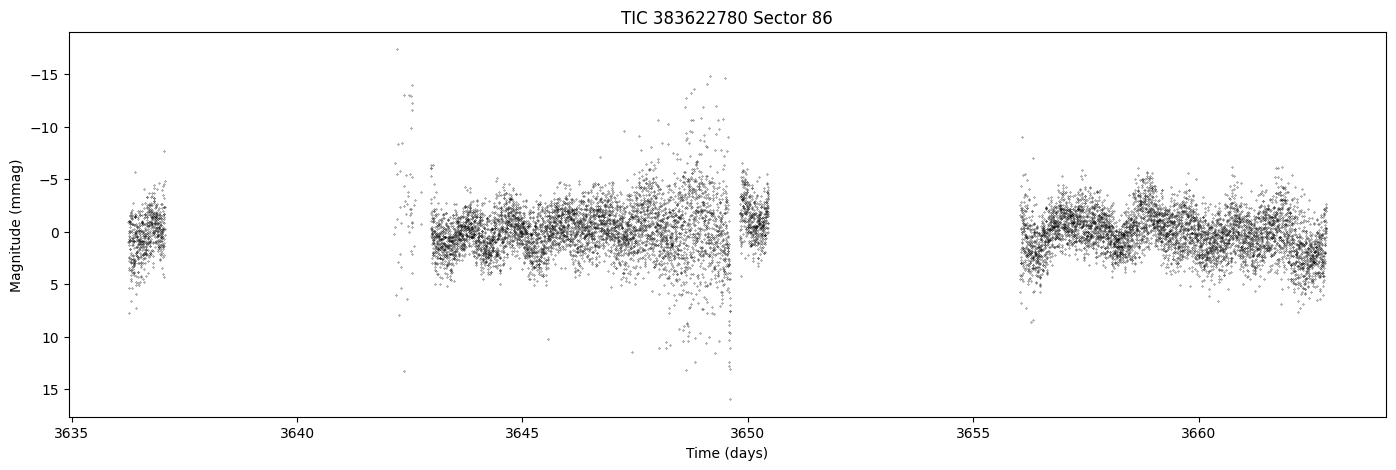

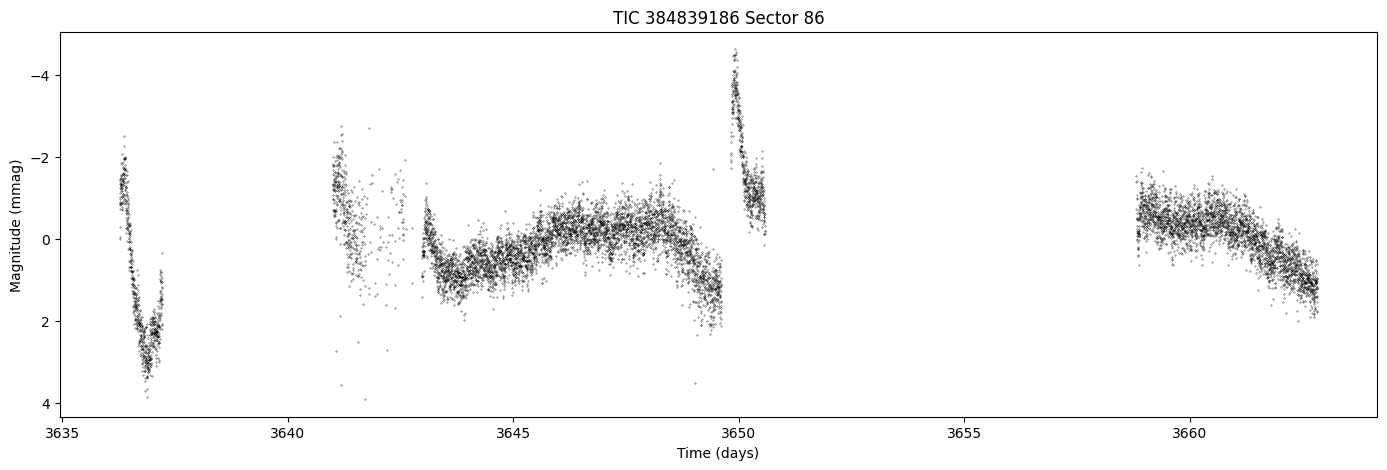

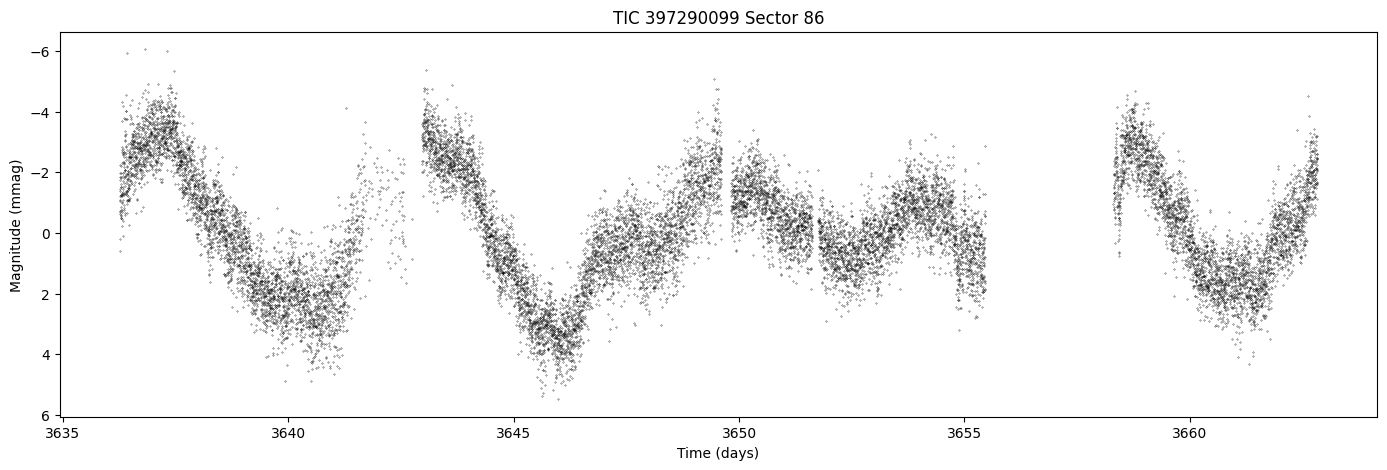

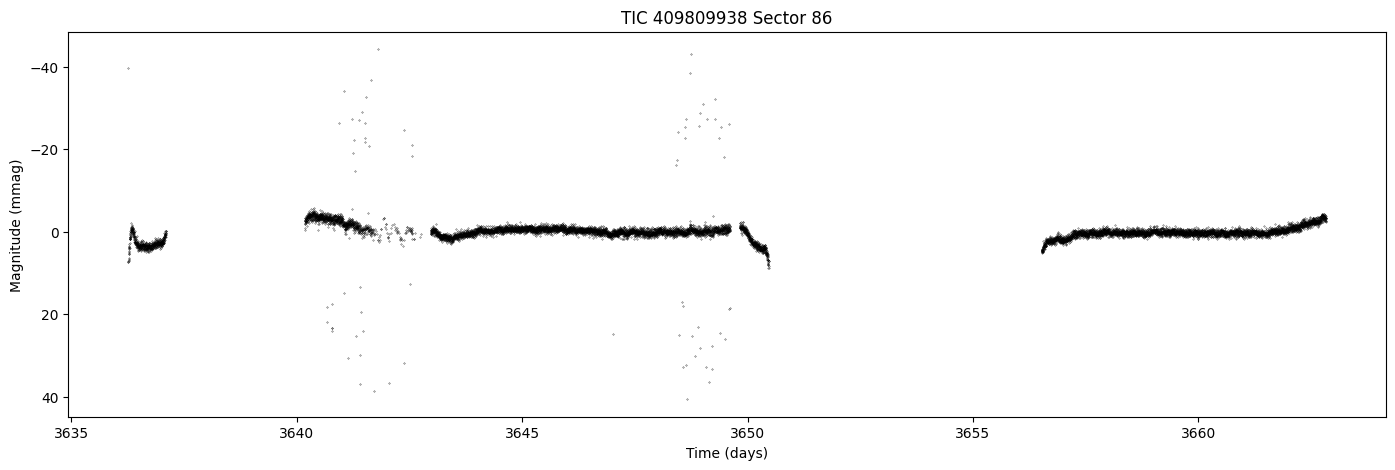

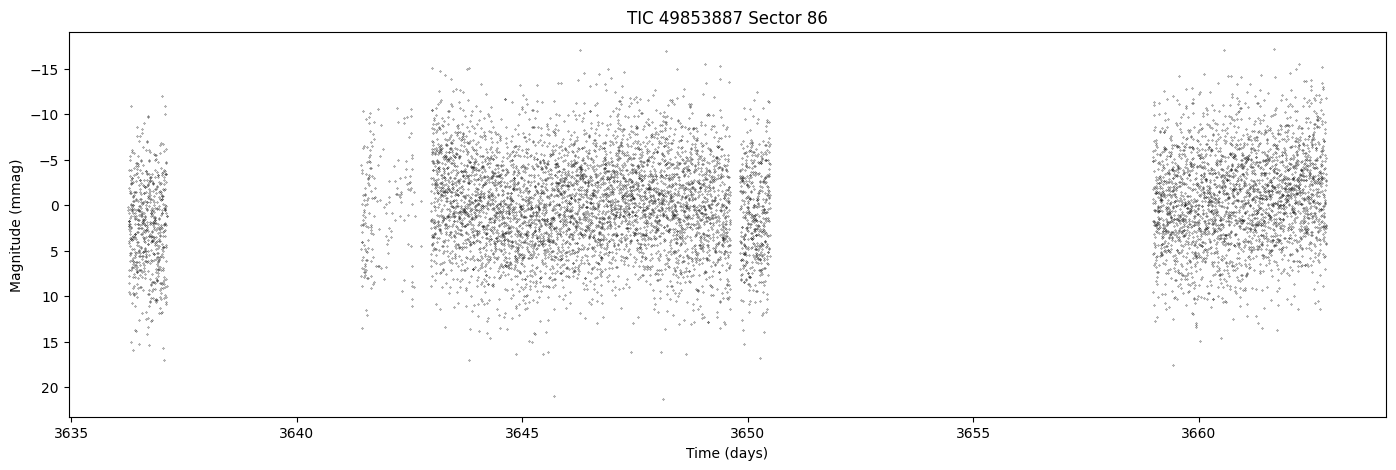

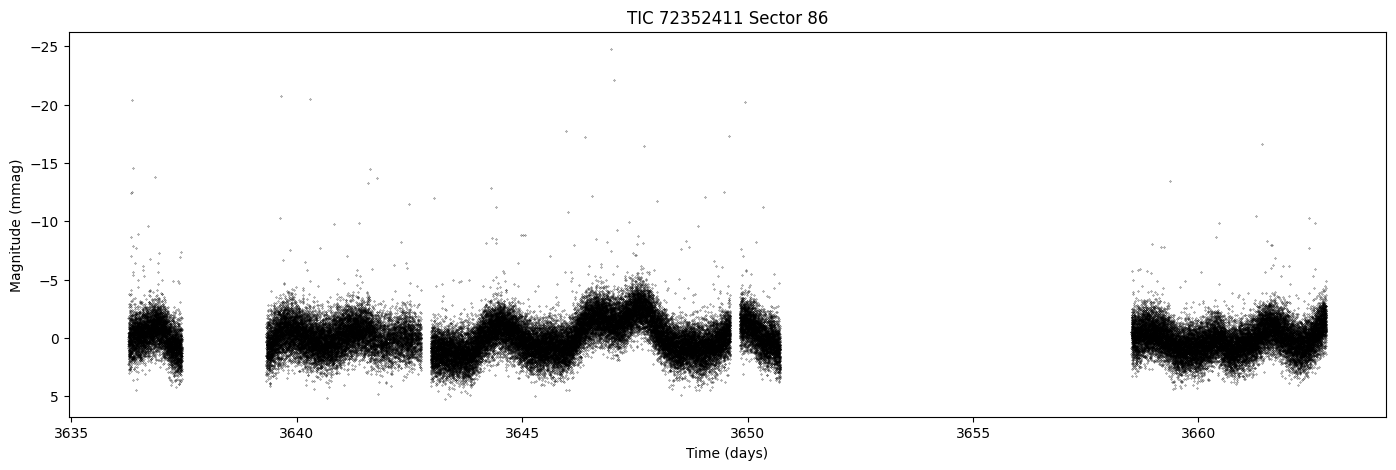

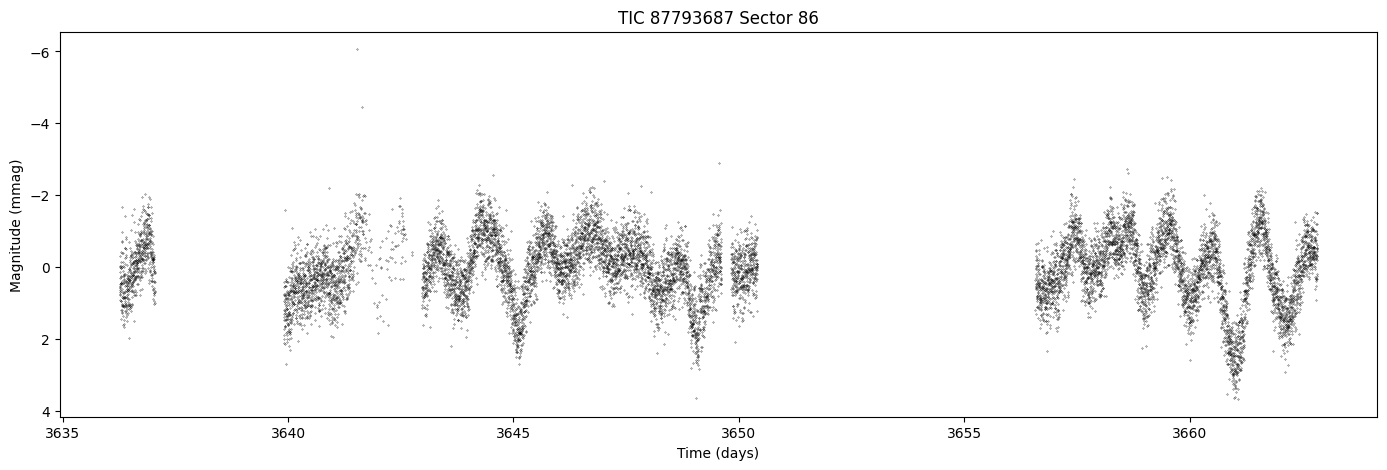

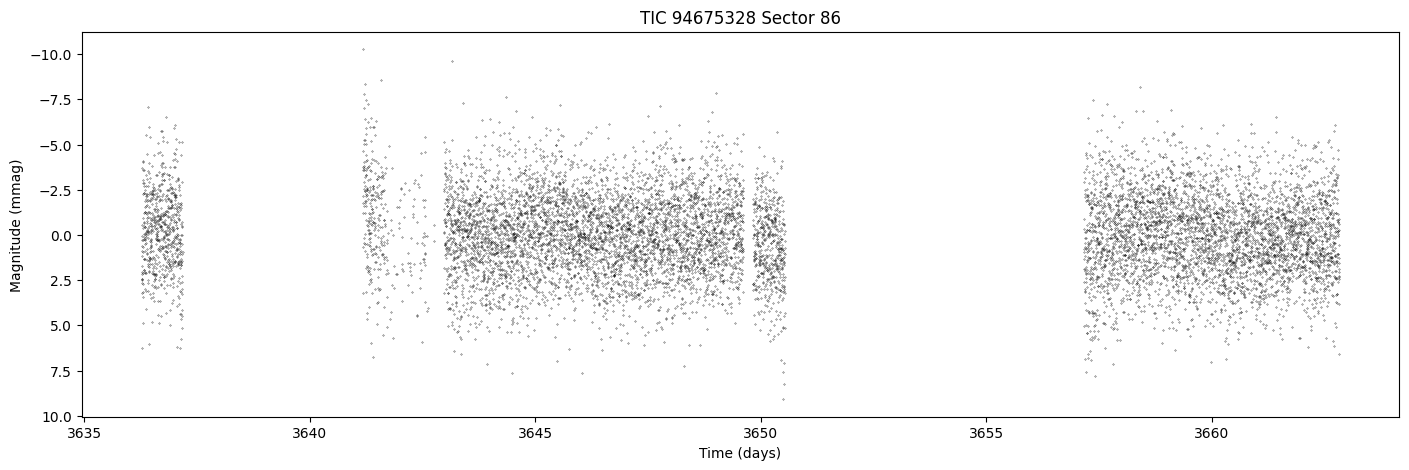

In [21]:
from pprint import pprint

# convert to millimagnitudes
def convert_to_mmag(lc: lk.LightCurve):
  median_flux = np.nanmedian(lc.flux)
  return -2.5 * np.log10(lc.flux / median_flux) * 1000  # Convert to mmag

for lc in lc_datasets:
  # Plot the light curve in millimagnitudes
  plt.figure(figsize=(17, 5))
  # Convert time to a numeric format
  time_numeric = lc.time.value  # Extract time as float values
  plt.plot(time_numeric, convert_to_mmag(lc), 'k.', markersize=0.5)
  plt.xlabel("Time (days)")
  plt.ylabel("Magnitude (mmag)")
  plt.gca().invert_yaxis()  # Magnitudes decrease as brightness increases
  # plt.legend(title="TItle")
  TICID = lc.meta.get("OBJECT", "Unknown")
  SECTOR = lc.meta.get("SECTOR", "Unknown")
  plt.title(f"{TICID} Sector {SECTOR}")
  plt.show()
  # pprint(lc.meta)

## 5 Analyze each star individually (optional)

### 5.1 Search all available sectors for this star

In [8]:
search_results = lk.search_lightcurve("TIC 327756689", mission="TESS", author="SPOC");
search_results

SearchResult containing 1 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 86 2024   SPOC     120   327756689      0.0

### 5.2 Search sectors which possible to join
It can help to understand the pattern with longer range of observation.
 * download all available sectors
 * plot sectors and decide which is more interested

In [11]:
select_sector = search_results#[1:2]
select_sector

SearchResult containing 1 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 86 2024   SPOC     120   327756689      0.0

In [12]:
lc_collection = select_sector.download_all();

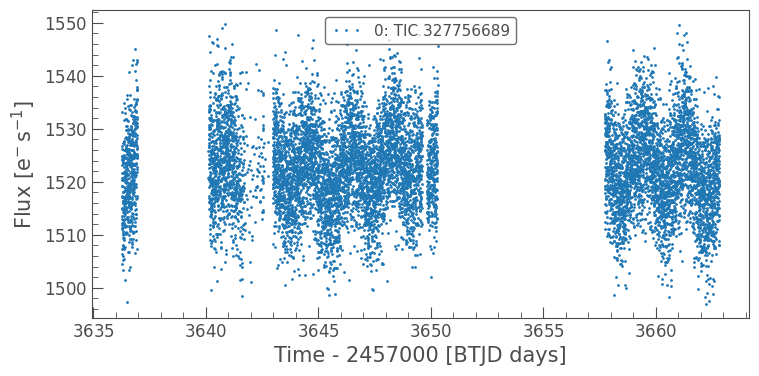

In [13]:
lc_collection.plot(linewidth=0, marker=".");

### 5.3 Stitch the sectors into one and plot
 Lightkurve library can help you to normalize the flux onto single line and provide better view of lightcurve. We can use different methods for moving noise and approximate some values if we have lots of unnecessary data for particular stiched collection and then plot the chart:
 * remove_outliers()
 * bin(15/24/60)

In [14]:
lc_collection_stitched = lc_collection.stitch();

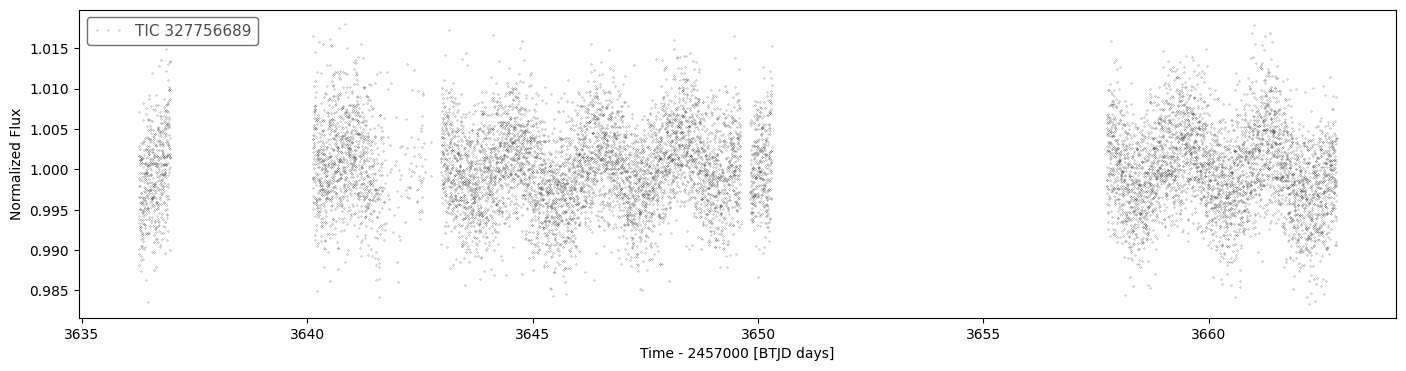

In [15]:
fig, ax = plt.subplots(figsize=(17, 4))

# Plot the light curve on the defined axis
lc_collection_stitched.plot(
    normalize="true", color="k", linewidth=0, marker=".", markersize=0.3, ax=ax
)

plt.show()

## 6 Find the star in astro catalogs and science publiccations

### 6.1 Retrieve coordinates for particular star

In [16]:
ra = search_results[0].ra
dec = search_results[0].dec

print(f"{ra} {dec}")
coords = f"{np.squeeze(ra)} {np.squeeze(dec)}";
print(coords)

[76.82369718] [49.39211947]
76.8236971830686 49.3921194704276


### 6.2 Find the stars in Simbad catalog using its coordinates

In [28]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.simbad import Simbad

coord = SkyCoord(ra=ra*u.deg, dec=dec*u.deg, frame='icrs')
Simbad.TIMEOUT = 120
Simbad.add_votable_fields('parallax', 'V', 'B', 'G', 'J', 'H', 'K', 'biblio')

result = Simbad.query_region(coord, radius='0d2m0s')  # Search within 2 arcmin
display(result)

<Table length=1>
    main_id           ra            dec       ... plx_qual     plx_bibcode     plx_err_prec
                     deg            deg       ...                                          
     object        float64        float64     ...   str1          object          int16    
--------------- -------------- -------------- ... -------- ------------------- ------------
TYC 3353-2160-1 76.84733658173 49.36527961622 ...        A 2020yCat.1350....0G            4

In [29]:
# query to get all names (identifiers) of an object
result_table = Simbad.query_objectids(result['main_id'][0])
display(result_table)

<Table length=6>
             id            
           object          
---------------------------
Gaia DR3 261560828267843328
              TIC 348472103
            TYC 3353-2160-1
    2MASS J05072335+4921550
Gaia DR1 261560828267843328
Gaia DR2 261560828267843328

### 6.3 Find references to science publications in Simbad

In [31]:
# Check if any objects are found
if result is not None:
    display(result[['main_id', 'ra', 'dec', 'biblio']])

    # Extract and format BibCodes into ADS links
    for i in range(len(result)):
        star_name = result['main_id'][i]
        bibcodes = result['biblio'][i].split('|')
        display(result[['plx_value', 'V', 'B', 'G', 'J', 'H', 'K']])
        print(f"\nReferences for {star_name}:")
        for bibcode in bibcodes[:5]:  # Show first 5 references
            print(f"- 🔗 https://ui.adsabs.harvard.edu/abs/{bibcode}")
        print(len(bibcodes))
else:
    print("No stars found near the given coordinates.")

<Table length=1>
    main_id           ra            dec       biblio
                     deg            deg             
     object        float64        float64     object
--------------- -------------- -------------- ------
TYC 3353-2160-1 76.84733658173 49.36527961622

<Table length=1>
plx_value         V                 B          ...         H                  K         
   mas                                         ...                                      
 float64       float64           float64       ...      float64            float64      
--------- ----------------- ------------------ ... ------------------ ------------------
   1.5504 11.84000015258789 12.149999618530273 ... 11.027000427246094 10.989999771118164


References for TYC 3353-2160-1:
- 🔗 https://ui.adsabs.harvard.edu/abs/
1


### 6.4 Query star's catalogs in VizieR

In [32]:
from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord
import astropy.units as u
import pandas as pd
from prettytable import PrettyTable

# Interested Catalogs:
# B/vsx/vsx - Variable Star indeX, Version 2025-02-10 (original column names in green) (8965496 rows)
# B/vsx/refs - Bibliography (references) of VSX stars (830415 rows)
# J/ApJS/258/16/tess-ebs - The Eclipsing Binary stars (TESS-EBs) catalog (4584 rows)
catalog1 = "B/vsx/vsx"  # AAVSO Variable Star Index
catalog2 = "J/ApJS/258/16/tess-ebs"
catalog_list = [catalog1, catalog2]

# Define search coordinates
coords = SkyCoord(ra=ra*u.deg, dec=dec*u.deg, frame="icrs")

# Define search radius
radius = 1 * u.deg  # 1-degree radius search

# Create a Vizier query object
Vizier.ROW_LIMIT = 100  # Limit number of returned rows
result = Vizier.query_region(coords, radius='0d2m0s', catalog=catalog_list)

catalog1 = catalog1.lower()
keys_lower = [key.lower() for key in result.keys()]

if catalog1 in keys_lower:
    real_key = [key for key in result.keys() if key.lower() == catalog1][0]
    df1 = result[real_key].to_pandas()
    print(df1)
else:
    print(f"Catalog '{catalog1}' not found.")

catalog2 = catalog2.lower()
keys_lower = [key.lower() for key in result.keys()]

if catalog2 in keys_lower:
    real_key = [key for key in result.keys() if key.lower() == catalog2][0]
    df2 = result[real_key].to_pandas()
    display(df2)
else:
    display(f"Catalog '{catalog2}' not found.")



   _q      OID n_OID                         Name  V             Type l_max  \
0   1  3108301        Gaia DR3 261561859059993088  0  DSCT|GDOR|SXPHE         

     max u_max n_max  ... l_min    min  u_min n_min l_Period Period  u_Period  \
0  12.95           G  ...        12.99            G             NaN             

  Sp  RAJ2000   DEJ2000  
0  A  76.8237  49.39212  

[1 rows x 21 columns]


"Catalog 'j/apjs/258/16/tess-ebs' not found."

## 7 Calculate Spectral Class


## 8 Verify the stars whether they are discovered as variable

In [ ]:
columns = ["Star", "Simbad URL", "References in Simbad", "AAVSO Variable Star Index", "TESS-EBs catalog", "TESS-EBs VType"]
df = pd.DataFrame(columns=columns)
df["Star"] = tic_star_names
display(df)

# # creating a DataFrame
# dict = {'Star' : ['TIC 112345', 'TIC 112345', 'TIC 112345', 'TIC 112345'],
#         'Simbad URL' : ['url', 'url', 'url', 'url'],
#         'References in Simbad' : [0, 10, 1, 0],
#         'AAVSO Variable Star Index' : [83, 99, 84, 76],
#         'TESS-EBs catalog': ['false', 'false', 'false', 'true'],
#         'TESS-EBs VType': ['', '', '', 'RR']}

In [58]:
lc_datasets = search_lightcurves(tic_star_names, 86, "TESS");

  0%|          | 0/50 [00:00<?, ?it/s]

In [59]:
simbad_urls = []

for i, lc in enumerate(lc_datasets):
  ra = lc.ra
  # display(ra)
  dec = lc.dec
  # display(dec)
  coord = SkyCoord(ra=ra*u.deg, dec=dec*u.deg, frame='icrs')
  Simbad.TIMEOUT = 120
  Simbad.add_votable_fields('biblio')
  result = Simbad.query_region(coord, radius='0d2m0s')  # Search within 2 arcmin
  # Extract the main identifier to create a reference link
  main_id = result['main_id'][0].decode() if isinstance(result['main_id'][0], bytes) else result['main_id'][0]

  # Create Simbad reference link
  simbad_urls.append(f"https://simbad.u-strasbg.fr/simbad/sim-id?Ident={main_id.replace(' ', '+')}")

display(simbad_urls)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [51]:


for i, lc in enumerate(lc_datasets):
  ra = lc.ra
  # display(ra)
  dec = lc.dec
  # display(dec)
  coord = SkyCoord(ra=ra*u.deg, dec=dec*u.deg, frame='icrs')
  Simbad.TIMEOUT = 120
  Simbad.add_votable_fields('biblio')
  result = Simbad.query_region(coord, radius='0d2m0s')  # Search within 2 arcmin
  numOfReferences = len(result['biblio'][0])

# display(lc_datasets)


# search_results = lk.search_lightcurve("TIC 117614745", mission="TESS", author="SPOC").download();
# ra = search_results.ra
# dec = search_results.dec

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
# Check if any objects are found
if result is not None:
    display(result[['main_id', 'ra', 'dec', 'biblio']])

    # Extract and format BibCodes into ADS links
    for i in range(len(result)):
        star_name = result['main_id'][i]
        bibcodes = result['biblio'][i].split('|')
        display(result[['plx_value', 'V', 'B', 'G', 'J', 'H', 'K']])
        print(f"\nReferences for {star_name}:")
        for bibcode in bibcodes[:5]:  # Show first 5 references
            print(f"- 🔗 https://ui.adsabs.harvard.edu/abs/{bibcode}")
        print(len(bibcodes))
else:
    print("No stars found near the given coordinates.")

In [35]:
# importing the modules
from IPython.display import display
import pandas as pd

# creating a DataFrame
dict = {'Star' : ['TIC 112345', 'TIC 112345', 'TIC 112345', 'TIC 112345'],
        'Simbad URL' : ['url', 'url', 'url', 'url'],
        'References in Simbad' : [0, 10, 1, 0],
        'AAVSO Variable Star Index' : [83, 99, 84, 76],
        'TESS-EBs catalog': ['false', 'false', 'false', 'true'],
        'TESS-EBs VType': ['', '', '', 'RR']}
df = pd.DataFrame(dict)

# displaying the DataFrame
display(df)

Star Simbad URL  References in Simbad  AAVSO Variable Star Index  \
0  TIC 112345        url                     0                         83   
1  TIC 112345        url                    10                         99   
2  TIC 112345        url                     1                         84   
3  TIC 112345        url                     0                         76   

  TESS-EBs catalog TESS-EBs VType  
0            false                 
1            false                 
2            false                 
3             true             RR

## 9 Show all starts on HR Diagram

In [ ]:
# Read in data that will be used for the calculations.
data = pd.read_csv("https://github.com/adamlamee/CODINGinK12/raw/master/data/stars.csv")

In [ ]:
# We wish to look at the first 5 rows of our data set
data.head(5)

proper         ra        dec    dist    mag  absmag     ci  \
0               Sol   0.000000   0.000000  0.0000 -26.70   4.850  0.656   
1  Proxima Centauri  14.495985 -62.679485  1.2959  11.01  15.447  1.807   
2   Rigil Kentaurus  14.660765 -60.833976  1.3248  -0.01   4.379  0.710   
3               NaN  14.660346 -60.838300  1.3248   1.35   5.739  0.900   
4    Barnard's Star  17.963472   4.693388  1.8238   9.54  13.235  1.570   

          temp         x         y         z  con       lum    var  var_min  \
0  5756.588113  0.000005  0.000000  0.000000  NaN  1.000000    NaN      NaN   
1  3383.441193 -0.472264 -0.361451 -1.151219  Cen  0.000058   V645   11.079   
2  5567.728737 -0.495203 -0.414084 -1.156625  Cen  1.543121    NaN    0.113   
3  4996.415833 -0.495181 -0.413973 -1.156674  Cen  0.440961    NaN      NaN   
4  3691.168543 -0.017373 -1.816613  0.149123  Oph  0.000443  V2500    9.590   

   var_max  
0      NaN  
1   10.939  
2   -0.087  
3      NaN  
4    9.490

In [ ]:
# The .shape command displays the (number of rows , number of columns) in a file.
data.shape

(119614, 16)

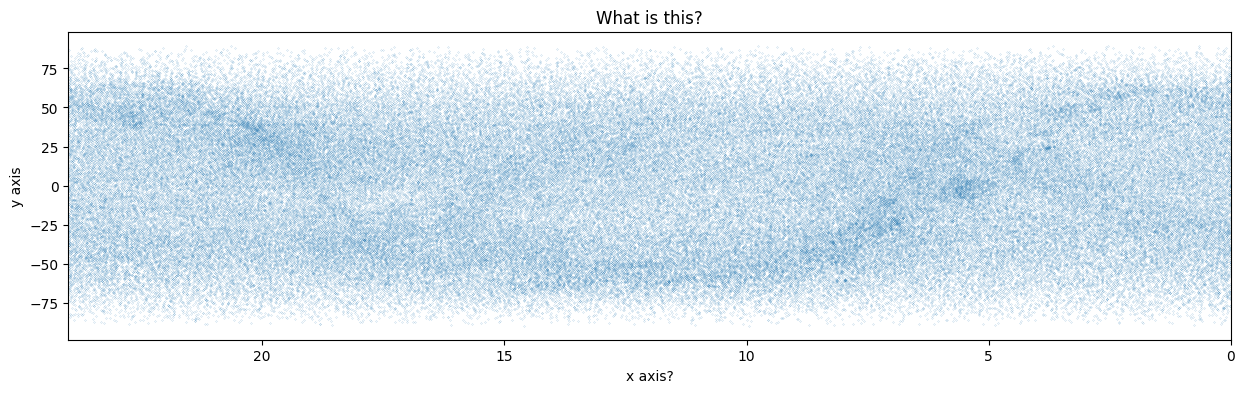

In [ ]:
fig = plt.figure(figsize=(15, 4))
plt.scatter(data['ra'],data['dec'], s=0.01)
plt.xlim(24, 0)
plt.title("What is this?")
plt.xlabel("x axis?")
plt.ylabel("y axis");

Text(0.5, 0, 'Log T (log K)')

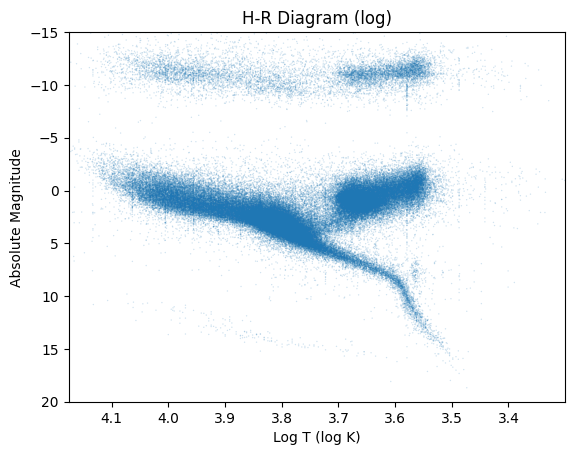

In [ ]:
# format the points on the plot
transparency = 0.2
size = 1

# draws a scatter plot
plt.scatter(np.log10(data.temp), data.absmag, s=size, edgecolors='none', alpha=transparency)
plt.xlim(np.log10(15000),np.log10(2000))
plt.ylim(20,-15)
plt.title("H-R Diagram (log)")
plt.ylabel("Absolute Magnitude")
plt.xlabel("Log T (log K)")

In [ ]:
# These are the abbreviations for all the constellations
data['con'].sort_values().unique()

array(['And', 'Ant', 'Aps', 'Aql', 'Aqr', 'Ara', 'Ari', 'Aur', 'Boo',
       'CMa', 'CMi', 'CVn', 'Cae', 'Cam', 'Cap', 'Car', 'Cas', 'Cen',
       'Cep', 'Cet', 'Cha', 'Cir', 'Cnc', 'Col', 'Com', 'CrA', 'CrB',
       'Crt', 'Cru', 'Crv', 'Cyg', 'Del', 'Dor', 'Dra', 'Equ', 'Eri',
       'For', 'Gem', 'Gru', 'Her', 'Hor', 'Hya', 'Hyi', 'Ind', 'LMi',
       'Lac', 'Leo', 'Lep', 'Lib', 'Lup', 'Lyn', 'Lyr', 'Men', 'Mic',
       'Mon', 'Mus', 'Nor', 'Oct', 'Oph', 'Ori', 'Pav', 'Peg', 'Per',
       'Phe', 'Pic', 'PsA', 'Psc', 'Pup', 'Pyx', 'Ret', 'Scl', 'Sco',
       'Sct', 'Ser', 'Sex', 'Sge', 'Sgr', 'Tau', 'Tel', 'TrA', 'Tri',
       'Tuc', 'UMa', 'UMi', 'Vel', 'Vir', 'Vol', 'Vul', nan], dtype=object)

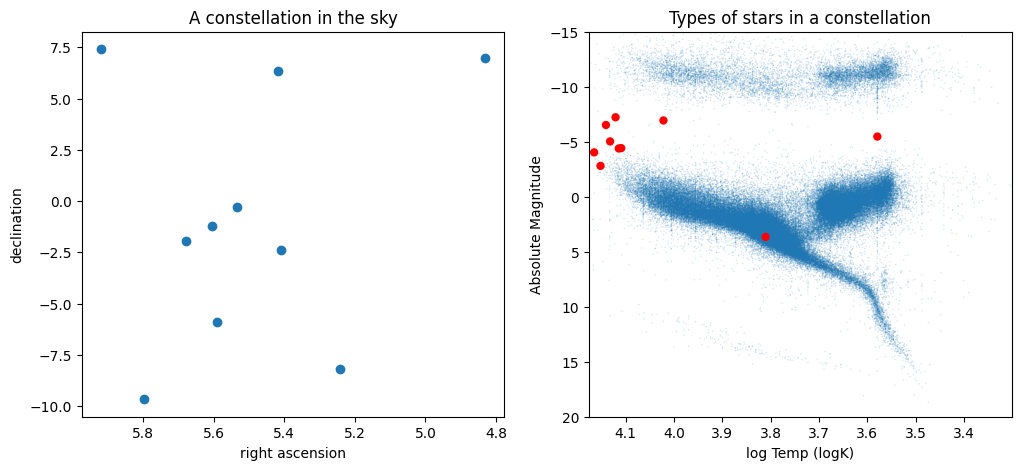

In [ ]:
# This picks a constellation to plot
constellation = data.query('con == "Ori"') # Ori is short for Orion

plt.close('all')
fig = plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

# This plots where the constellation's 10 brightest stars are in the sky
constellation = constellation.sort_values('mag').head(10)
plt.scatter(constellation['ra'],constellation['dec'])
plt.gca().invert_xaxis()
plt.title("A constellation in the sky")
plt.xlabel("right ascension")
plt.ylabel("declination")

plt.subplot(1, 2, 2)
# format the points on the plot
transparency = 0.2
size = 1

# plots the constellation's stars in red over the big plot of all stars
plt.scatter(np.log10(data['temp']), data['absmag'], s=size, edgecolors='none', alpha=transparency)
logtemps = np.log10(constellation['temp'])
#plt.scatter(constellation['temp'], constellation['absmag'], color='red', edgecolors='none')
plt.scatter(logtemps, constellation['absmag'], color='red', edgecolors='none')
#plt.xlim(2000,15000)
plt.xlim(np.log10(15000),np.log10(2000))
plt.ylim(20,-15)
plt.title("Types of stars in a constellation")
plt.ylabel("Absolute Magnitude")
plt.xlabel("log Temp (logK)")
plt.show()

![img](https://openstax.org/apps/archive/20250116.201611/resources/dd3b626194347b820b300c0437928fdb31869efd)

http://www.astronexus.com/projects/hyg
https://github.com/astronexus/HYG-Database/tree/main


https://github.com/astronexus/ATHYG-Database/tree/main - 2million records

https://www.youtube.com/watch?v=8iSy3w5LQwo